<a href="https://colab.research.google.com/github/pvihung/Uber-Data-Analytics/blob/main/UberAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uber Data Analytics
This comprehensive dataset contains detailed ride-sharing data from Uber operations for the year 2024, providing rich insights into booking patterns, vehicle performance, revenue streams, cancellation behaviors, and customer satisfaction metrics.

## Data Diving:
1. Revenue from

*   Vehicle type
*   Payment method
*   Date with highest/lowest booking
*   Time with highest/lowest booking

2. Cancellation:

*   Time with most/least cancellation
*   Date with most/least cancellation
*   Reason for cancelling by Customer/Driver Cancellation Reason/Incomplete Rides Reason proportion
*   Revenue lost
* How VTAT and CTAT affects the cancellation rate
*  Combination of vehicle + Payment has the least cancellation

3. Useful insights:
*   Top Pickup/Drop Location
*   Average drive length
*   What destination have the highest cancellation

4. Rating:

*  Rating of driver/customer
*  Correlation of rating with ride distance, booking value, and cancellation
*  Comparation rating for customers vs drivers by time and vehicle type

5. Customer:
*  CustomerID with the highest number of cancellation
*  Loyal Customers
*  Customers with highest spending

##📋 Data Schema
Date: Date of the booking

Time: Time of the booking

Booking ID: Unique identifier for each ride booking

Booking : Status of booking (Completed, Cancelled by Customer, Cancelled by Driver, etc.)

Customer ID: Unique identifier for customers

Vehicle Type: Type of vehicle (Go Mini, Go Sedan, Auto, eBike/Bike, UberXL, Premier Sedan)

Pickup Location: Starting location of the ride

Drop Location: Destination location of the ride

Avg VTAT: Average Vehicle Time at Arrival

Avg CTAT: Average Customer Time at Arrival

Cancelled Rides by Customer: Customer-initiated cancellation flag

Reason for cancelling by Customer: Reason for customer cancellation

Cancelled Rides by Driver: Driver-initiated cancellation flag

Driver Cancellation Reason: Reason for driver cancellation

Incomplete Rides: Incomplete ride flag

Incomplete Rides Reason: Reason for incomplete rides

Booking Value: Total fare amount for the ride

Ride Distance: Distance covered during the ride (in km)

Driver Ratings: Rating given to driver (1-5 scale)

Customer Rating: Rating given by customer (1-5 scale)

Payment Method: Method used for payment (UPI, Cash, Credit Card, Uber Wallet, Debit Card)

## Key Takeaways:

1. 💰 Revenue Distribution by Payment Method
**UPI**: Highest contributor (40% of total revenue)

**Cash**: Second highest (25% of total revenue)

**Credit Card**: ~15% of total revenue

**Uber Wallet**: ~12% of total revenue

**Debit Card**: ~8% of total revenue

2. 🚫 Cancellation Patterns
**Customer Cancellation Reasons**:

**Wrong Address**: 22.5%

**Driver Issues**: 22.4%

**Driver Not Moving**: 22.2%

**Change of Plans**: 21.9%

**App Issues**: 11.0%

3. Driver Cancellation Reasons:
**Capacity Issues**: 25.0%

**Customer Related Issues**: 25.3%

**Personal & Car Issues**: 24.9%

**Customer Behavior**: 24.8%

4. ⭐ Rating Analysis
**Customer Ratings**: Consistently high across all vehicle types (4.40-4.41)

**Driver Ratings**: Slightly lower but stable (4.23-4.24)

**Highest Rated**: Go Sedan (4.41 customer rating)

**Most Satisfied Drivers**: UberXL category (4.24 rating)

5. 📈 Data Quality
**Completeness**: Comprehensive coverage with minimal missing values

**Consistency**: Standardized vehicle types and status categories

**Temporal Coverage**: Full year 2024 data with daily granularity

**Geographic Scope**: Multiple pickup and drop locations

**Balanced Distribution**: Good representation across all vehicle types and time periods

In [ ]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ncr = pd.read_csv('/content/ncr_ride_bookings.csv')
ncr

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,NaN,NaN,NaN,NaN,NaN,475.0,40.08,3.7,4.1,Uber Wallet
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,NaN,NaN,NaN,NaN,NaN,1093.0,21.31,4.8,5.0,UPI
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,NaN,NaN,NaN,NaN,NaN,852.0,15.93,3.9,4.4,Cash
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,NaN,NaN,NaN,NaN,NaN,333.0,45.54,4.1,3.7,UPI


### Data Cleaning

In [ ]:
ncr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148767 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   date                               148767 non-null  object 
 1   time                               148767 non-null  object 
 2   booking_id                         148767 non-null  object 
 3   booking_status                     148767 non-null  object 
 4   customer_id                        148767 non-null  object 
 5   vehicle_type                       148767 non-null  object 
 6   pickup_location                    148767 non-null  object 
 7   drop_location                      148767 non-null  object 
 8   avg_vtat                           138366 non-null  float64
 9   avg_ctat                           101175 non-null  float64
 10  cancelled_rides_by_customer        148767 non-null  float64
 11  reason_for_cancelling_by_customer  10402 non

In [ ]:
# Remove duplicate
# We will work based on BookingID
ncr['Booking ID'].duplicated().sum()

ncr = ncr.drop_duplicates(subset=['Booking ID'])

ncr.info()

KeyError: 'Booking ID'

In [ ]:
# Normalization
ncr.columns = ncr.columns.str.lower().str.replace(' ', '_')
ncr.columns

Index(['time', 'booking_status', 'avg_vtat', 'avg_ctat', 'booking_value',
       'ride_distance', 'driver_ratings', 'customer_rating', 'day_of_week',
       'month', 'day', 'pickup_badarpur', 'pickup_barakhamba_road',
       'pickup_dwarka_sector_21', 'pickup_khandsa', 'pickup_madipur',
       'pickup_other', 'pickup_pragati_maidan', 'pickup_saket',
       'pickup_shivaji_park', 'pickup_vishwavidyalaya', 'drop_basai_dhankot',
       'drop_cyber_hub', 'drop_lajpat_nagar', 'drop_lok_kalyan_marg',
       'drop_narsinghpur', 'drop_nehru_place', 'drop_other',
       'drop_punjabi_bagh', 'drop_shastri_nagar', 'drop_udyog_vihar',
       'vehicle_type_auto', 'vehicle_type_bike', 'vehicle_type_go_mini',
       'vehicle_type_go_sedan', 'vehicle_type_premier_sedan',
       'vehicle_type_uber_xl', 'vehicle_type_ebike', 'payment_method_cash',
       'payment_method_credit_card', 'payment_method_debit_card',
       'payment_method_upi', 'payment_method_uber_wallet',
       'payment_method_nan', 'boo

In [ ]:
print(ncr.booking_status.value_counts())

# Change the value inside booking_status into lowercase
ncr['booking_status'] = ncr['booking_status'].str.lower()

booking_status
completed     92248
cancelled     37191
incomplete     8927
Name: count, dtype: int64


In [ ]:
# Create a function to change the value inside column into lowercase
def lowercase_value(df, column_name):
  df[column_name] = df[column_name].str.lower()

lowercase_value(ncr, 'reason_for_cancelling_by_customer')
lowercase_value(ncr, 'driver_cancellation_reason')
lowercase_value(ncr, 'incomplete_rides_reason')

KeyError: 'reason_for_cancelling_by_customer'

In [ ]:
# We only check the hour in the time column
ncr['time'] = ncr['time'].str.split(':').str[0]
ncr

In [ ]:
# Handle Null
ncr.isnull().sum()

# We can tell that the neccessary information (date, time, booking_id, booking_status, vehicle_type,
# pick_up, and drop location are all non-null, then we do not need to drop any rows)

In [ ]:
ncr.describe()

In [ ]:
# Based on this, we can tell that cancelled_rides_by_customer, cancelled_rides_by_driver, and incomplete_rides
# only have 2 types of values: 1 and Nan => change NaN to 0

def null_to_zero(df, column_name):
  df[column_name] = df[column_name].fillna(0)

null_to_zero(ncr, 'cancelled_rides_by_customer')
null_to_zero(ncr, 'cancelled_rides_by_driver')
null_to_zero(ncr, 'incomplete_rides')

In [ ]:
ncr.isnull().sum()

In [ ]:
# Now for the reasons
ncr[['reason_for_cancelling_by_customer', 'driver_cancellation_reason', 'incomplete_rides_reason']].value_counts(dropna=False)

# We can tell the data is pretty correct, as only 1 out of 3 columns will have reason, the rest will only have NaN
# We might want to keep the NaN

In [ ]:
ncr[['reason_for_cancelling_by_customer', 'driver_cancellation_reason', 'incomplete_rides_reason']].apply(lambda x: x.value_counts(dropna=False))

In [ ]:
# Handling outliers
ncr.describe()

In [ ]:
# The only column that might have outlier is booking_value, since 4277 are much higher than 689 (75% qua)
ncr.booking_value.hist(bins=50, figsize=(20,10))

In [ ]:
ncr[ncr['booking_value']>2500]

# Based on the histogram and number of rows, we should for now keep those value,
# we can see clearly later when we standardlize the data

In [ ]:
# We can see that the string in booking_id have "", so we should replace it with blank
ncr['booking_id'] = ncr.booking_id.str.replace('"','')

In [ ]:
# The same goes with customer_id
ncr['customer_id'] = ncr.customer_id.str.replace('"','')

In [ ]:
ncr

### EDA

array([[<Axes: title={'center': 'avg_vtat'}>,
        <Axes: title={'center': 'avg_ctat'}>,
        <Axes: title={'center': 'cancelled_rides_by_customer'}>],
       [<Axes: title={'center': 'cancelled_rides_by_driver'}>,
        <Axes: title={'center': 'incomplete_rides'}>,
        <Axes: title={'center': 'booking_value'}>],
       [<Axes: title={'center': 'ride_distance'}>,
        <Axes: title={'center': 'driver_ratings'}>,
        <Axes: title={'center': 'customer_rating'}>]], dtype=object)

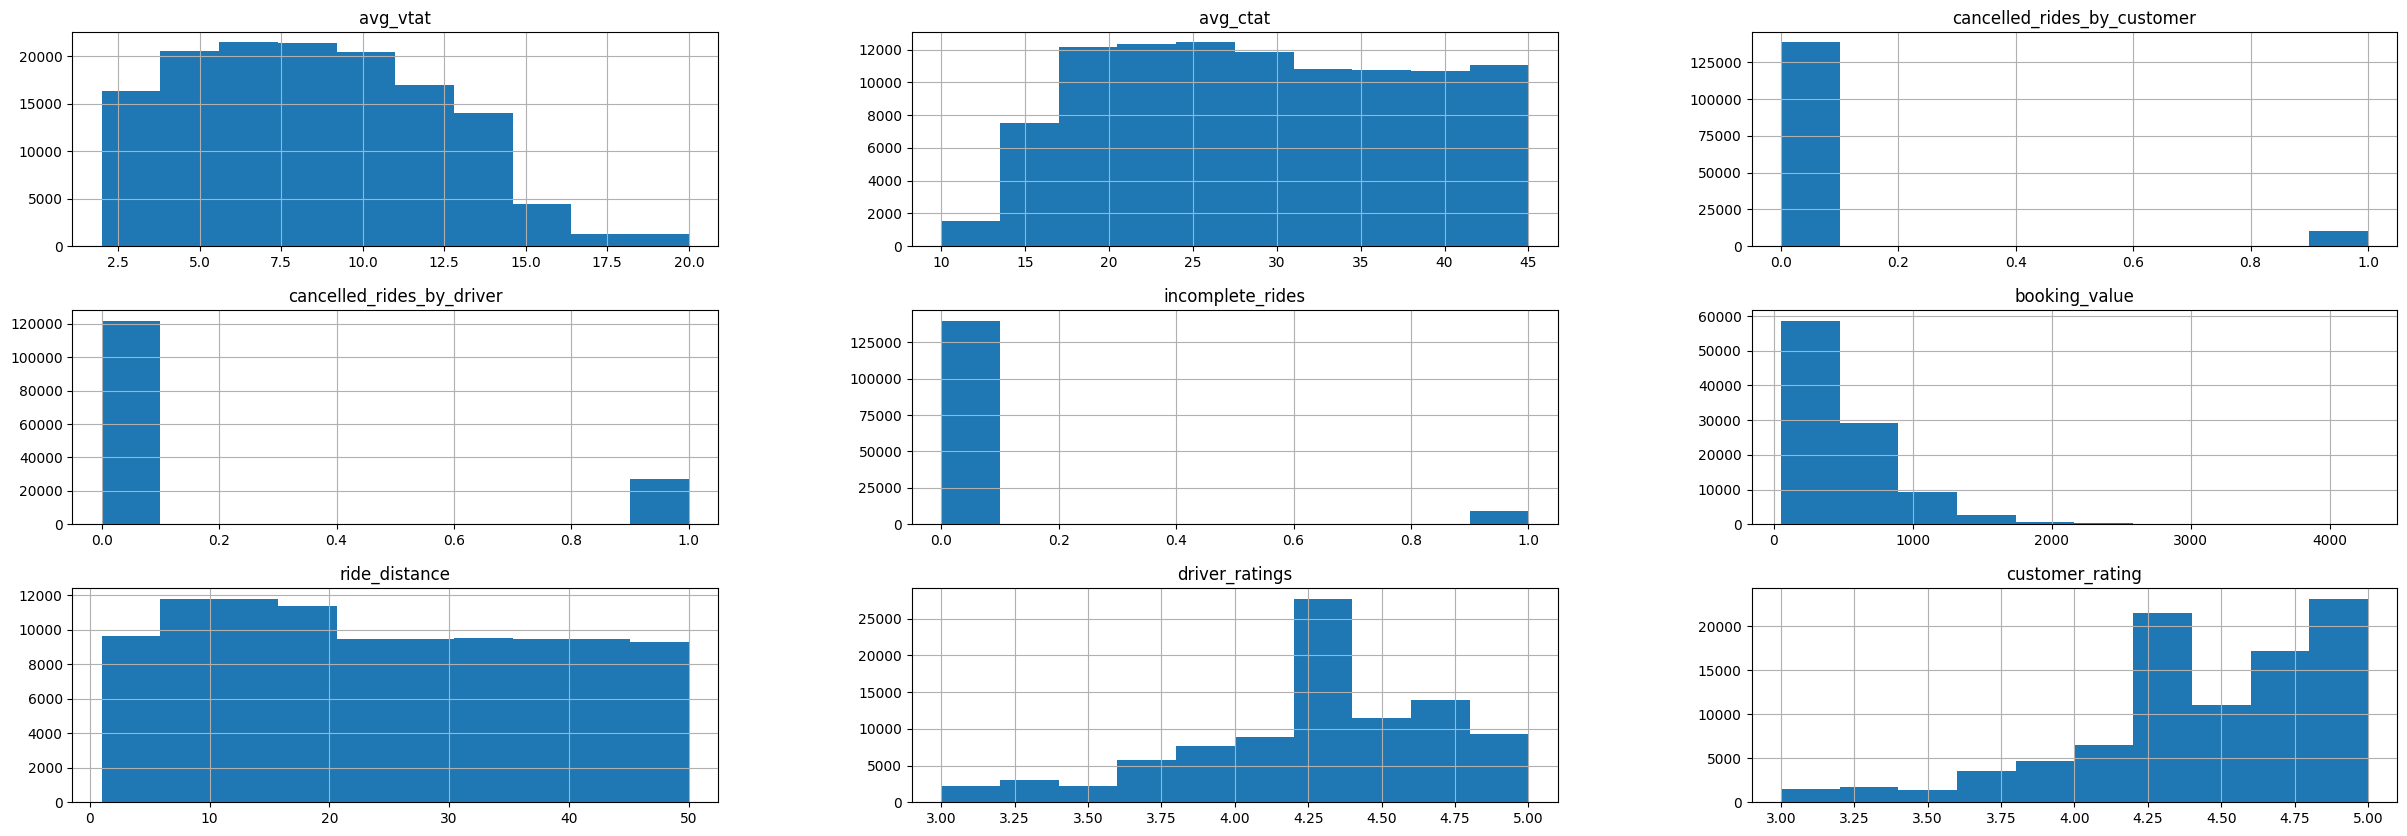

In [ ]:
ncr.hist(figsize=(30,10))

In [ ]:
ncr.select_dtypes('number').corr()

,avg_vtat,avg_ctat,cancelled_rides_by_customer,cancelled_rides_by_driver,incomplete_rides,booking_value,ride_distance,driver_ratings,customer_rating
avg_vtat,1.000000,0.062454,0.306444,-0.124024,-0.170356,0.002310,0.063018,-0.005255,-0.004442
avg_ctat,0.062454,1.000000,NaN,NaN,-0.319393,0.000267,0.101506,0.001129,0.001349
cancelled_rides_by_customer,0.306444,NaN,1.000000,-0.128494,-0.069276,NaN,NaN,NaN,NaN
cancelled_rides_by_driver,-0.124024,NaN,-0.128494,1.000000,-0.118406,NaN,NaN,NaN,NaN
incomplete_rides,-0.170356,-0.319393,-0.069276,-0.118406,1.000000,0.000825,-0.313093,NaN,NaN
booking_value,0.002310,0.000267,NaN,NaN,0.000825,1.000000,0.005129,-0.000175,-0.000553
ride_distance,0.063018,0.101506,NaN,NaN,-0.313093,0.005129,1.000000,-0.001857,0.004358
driver_ratings,-0.005255,0.001129,NaN,NaN,NaN,-0.000175,-0.001857,1.000000,-0.000773
customer_rating,-0.004442,0.001349,NaN,NaN,NaN,-0.000553,0.004358,-0.000773,1.000000


#### 1. Revenue from
- Vehicle type
- Payment method
- Date with highest/lowest booking
- Time with highest/lowest booking

##### a. Revenue based on vehicle type

In [ ]:
# Proportion of each type of vehicle
ncr['vehicle_type'].value_counts(normalize=True, dropna = False) * 100

,proportion
vehicle_type,
Auto,24.957820
Go Mini,19.867309
Go Sedan,18.104822
Bike,15.001983
Premier Sedan,12.065848
eBike,7.029785
Uber XL,2.972433


In [ ]:
# we will assume that the the incomplete ride will not be counted

vehicle_group = ncr.groupby('vehicle_type')

vehicle_booking_count = vehicle_group['booking_id'].count()

vehicle_booking_revenue = vehicle_group['booking_value'].sum()

vehicle_stats = pd.DataFrame({
    'Booking Count': vehicle_booking_count,
    'Booking Revenue': vehicle_booking_revenue
}).reset_index()

vehicle_stats

,vehicle_type,Booking Count,Booking Revenue
0,Auto,37129,12780280.0
1,Bike,22318,7768014.0
2,Go Mini,29556,10256054.0
3,Go Sedan,26934,9301097.0
4,Premier Sedan,17950,6222398.0
5,Uber XL,4422,1516473.0
6,eBike,10458,3581948.0


/tmp/ipython-input-278948047.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='vehicle_type',


Text(0.5, 1.0, 'Number of Booking for each type of Vehicle')

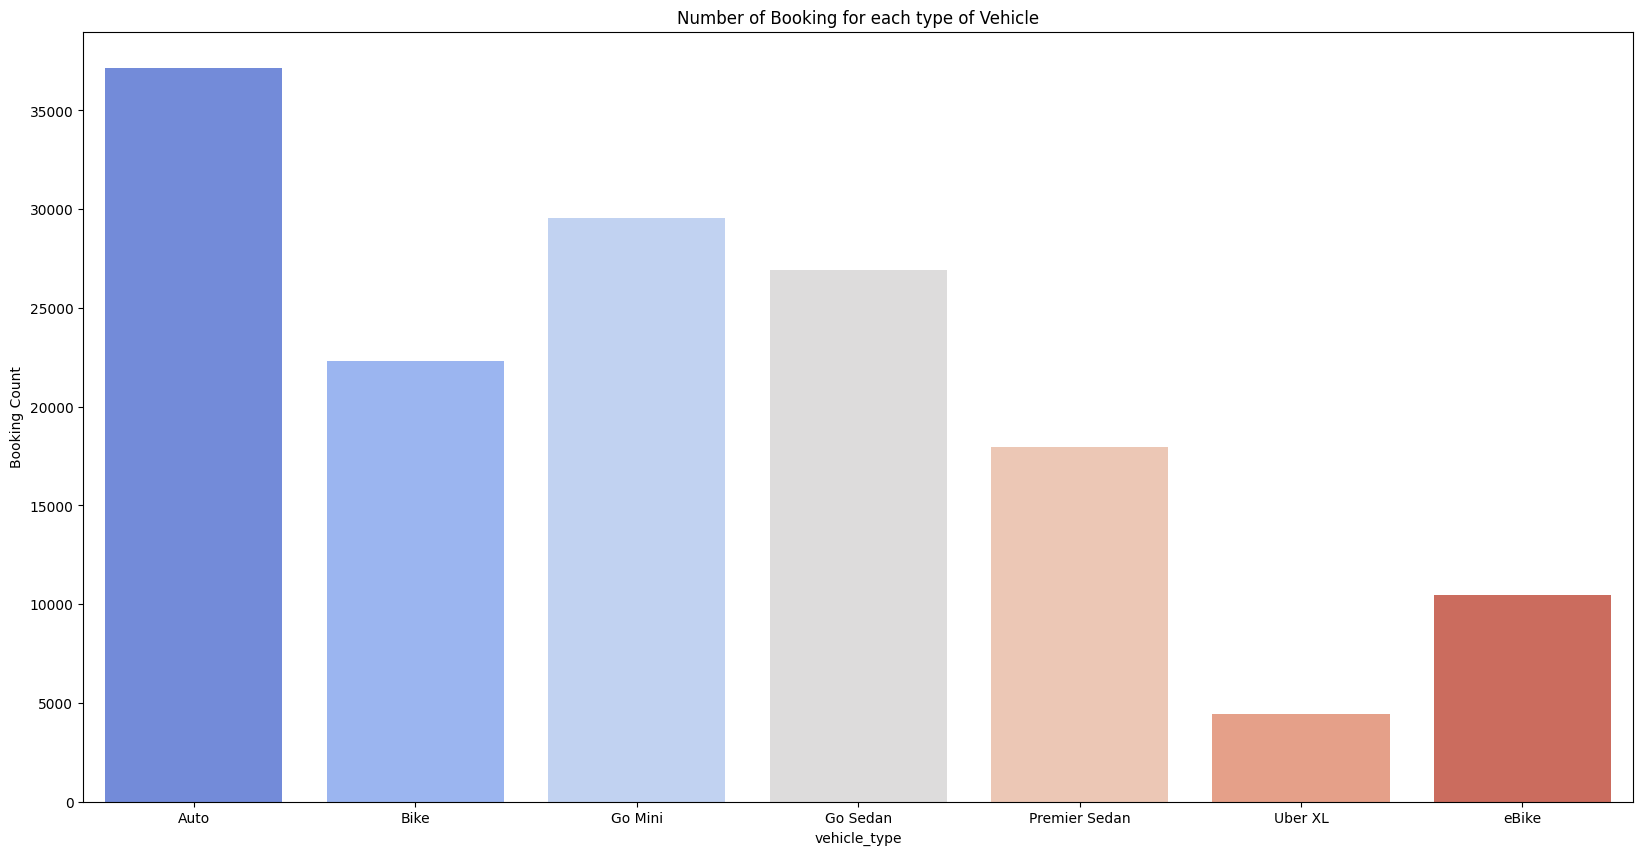

In [ ]:
# Based on number of booking
plt.figure(figsize=(20,10))
order = vehicle_stats.vehicle_type.value_counts().index
sns.barplot(x='vehicle_type',
            y= 'Booking Count',
            data=vehicle_stats,
            order = order.sort_values(ascending = True),
            palette='coolwarm')
plt.title('Number of Booking for each type of Vehicle')

/tmp/ipython-input-3832662059.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Axes: xlabel='vehicle_type', ylabel='Booking Revenue'>

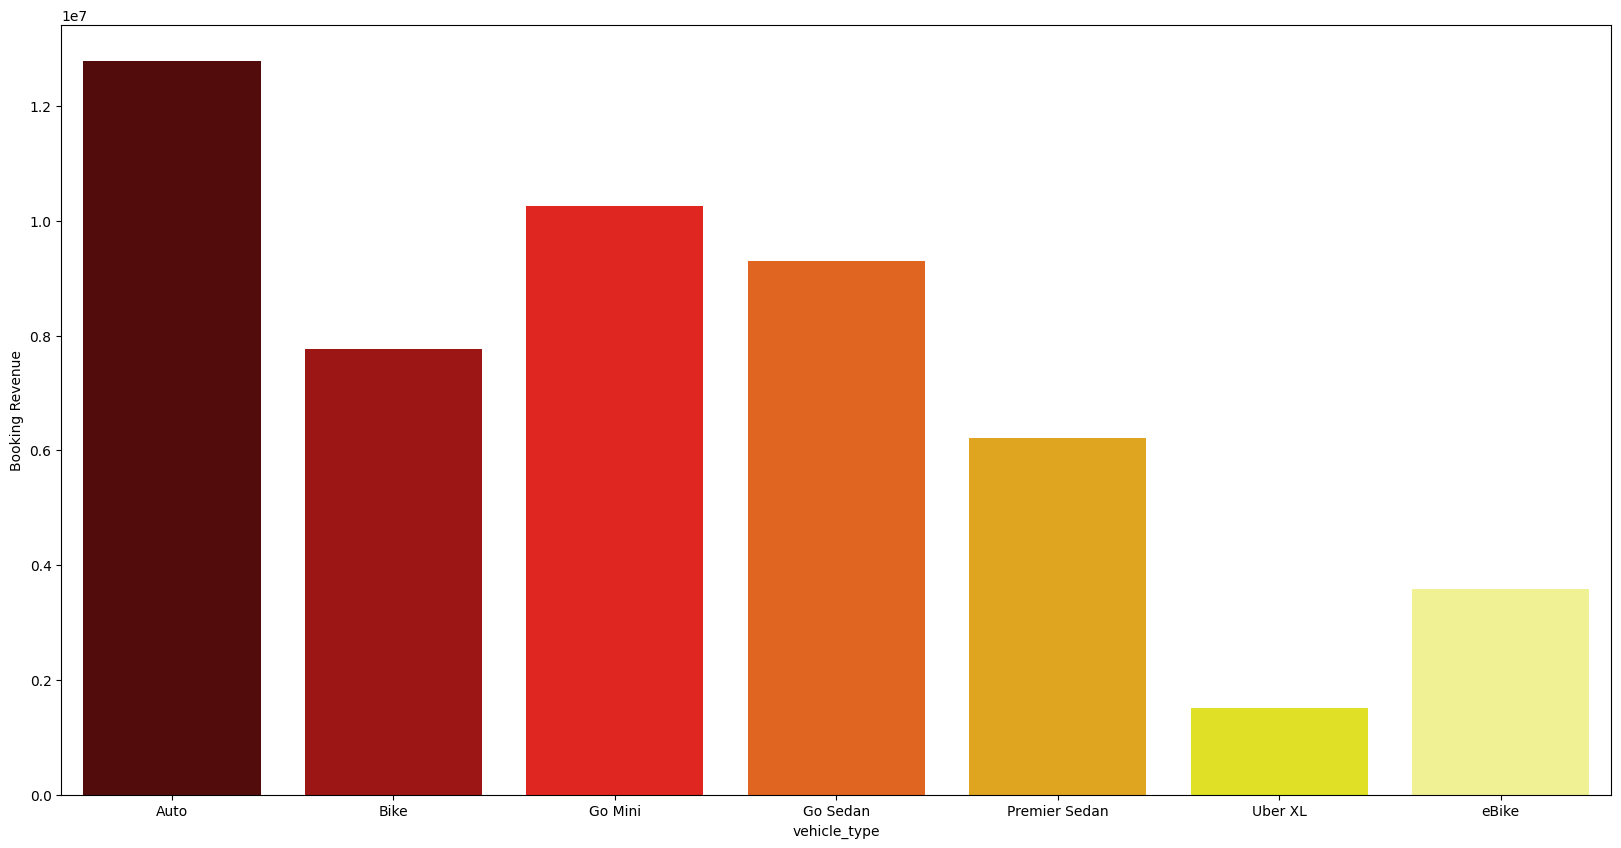

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(
    data = vehicle_stats,
    x='vehicle_type',
    y='Booking Revenue',
    palette='hot',
)

##### b. Payment method

In [ ]:
payment = ncr.payment_method.value_counts().reset_index()
payment

,payment_method,count
0,UPI,45542
1,Cash,25157
2,Uber Wallet,12174
3,Credit Card,10119
4,Debit Card,8183


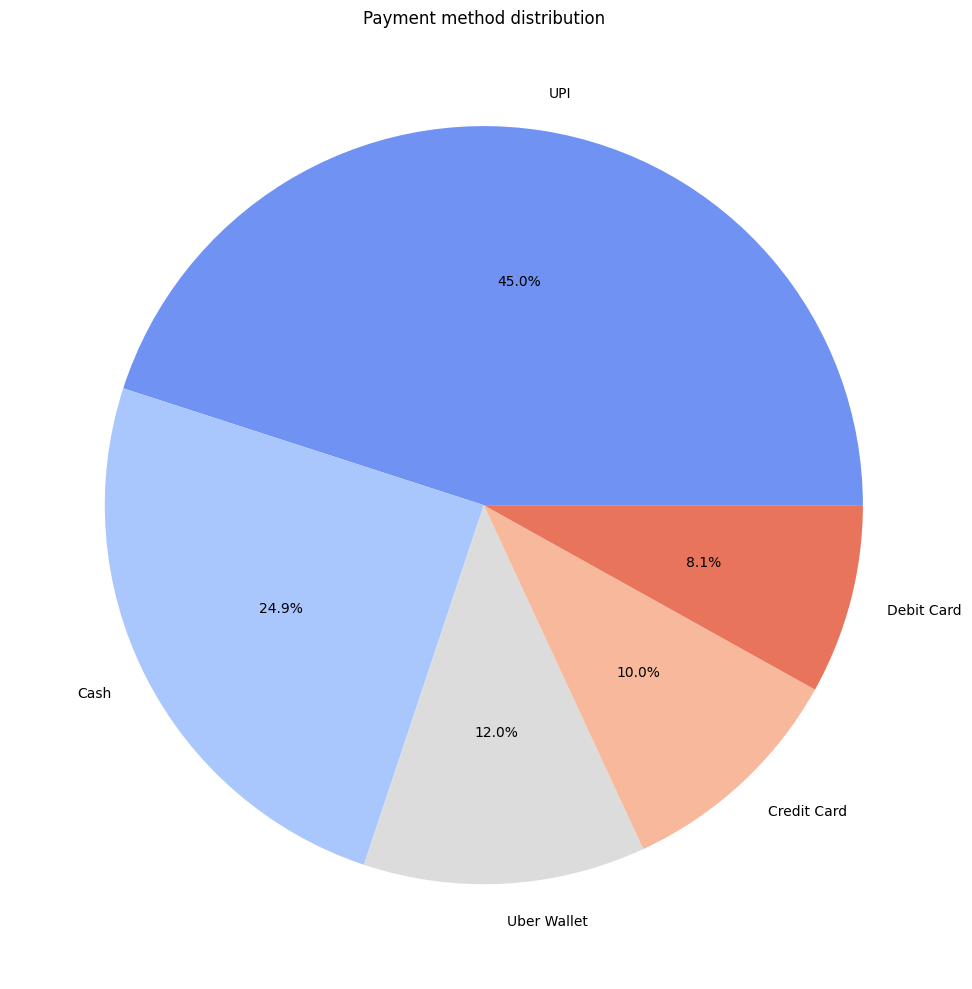

In [ ]:
plt.figure(figsize=(20,10))
colors = sns.color_palette('coolwarm', len(payment))
plt.pie(
    payment['count'],
    labels = payment.payment_method,
    autopct= '%1.1f%%',
    colors = colors
)
plt.title('Payment method distribution')
plt.tight_layout()

##### c. Date with the highest/lowest revenue/booking

In [ ]:
ncr.date.value_counts().head(10)

,count
date,
2024-11-16,461
2024-09-18,454
2024-05-09,452
2024-11-29,450
2024-10-09,449
2024-10-12,449
2024-10-13,448
2024-02-06,448
2024-07-17,447


In [ ]:
date_group = ncr.groupby('date')

date_booking_count= date_group['booking_id'].count()

date_booking_revenue = date_group['booking_value'].sum()

date_stats = pd.DataFrame({
    'booking_count': date_booking_count,
    'booking_revenue': date_booking_revenue
}).reset_index()

date_plot_high = date_stats.sort_values(by=['booking_revenue','booking_count'],
                       ascending = [False, False]).head(10)

date_plot_low= date_stats.sort_values(by=['booking_revenue','booking_count'],
                       ascending = [False, False]).tail(10)


/tmp/ipython-input-2953099569.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


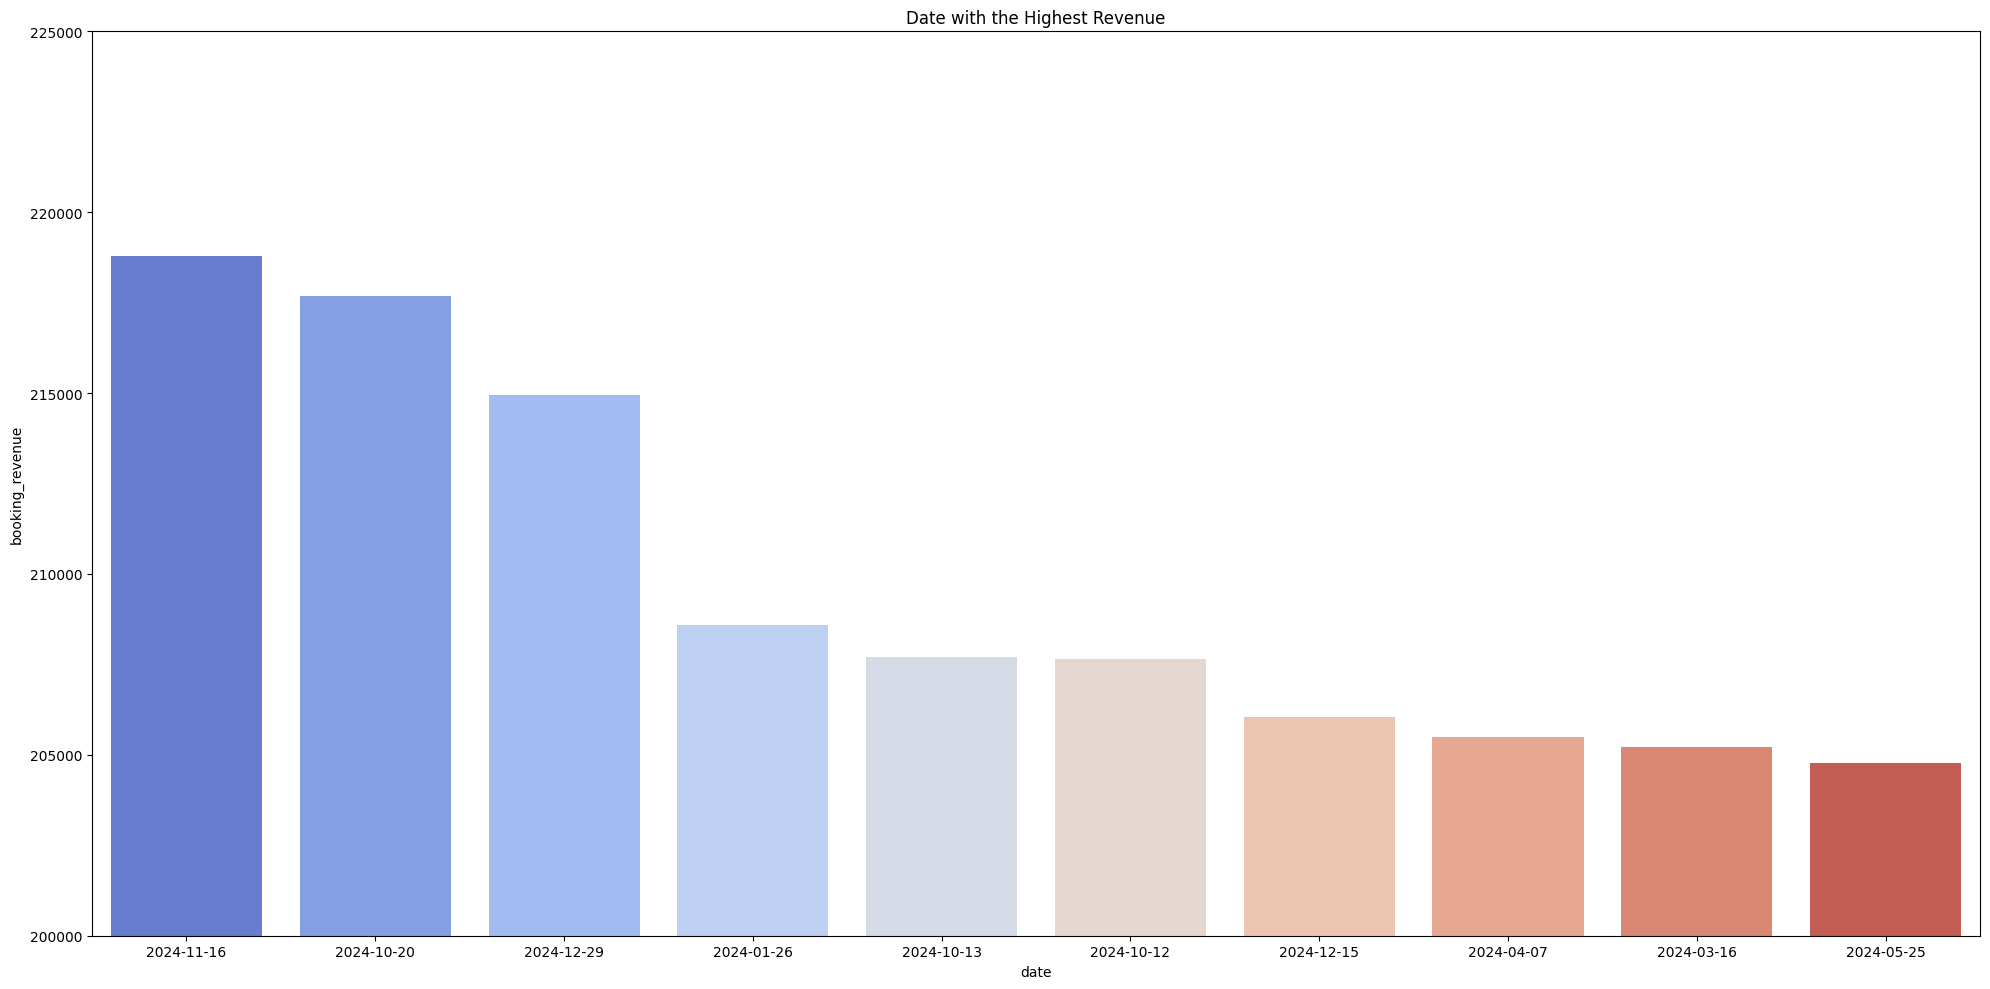

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(
    data=date_plot_high,
    x='date',
    y = 'booking_revenue',
    palette='coolwarm'
)
plt.ylim(200000, 225000)
plt.title('Date with the Highest Revenue')
plt.tight_layout()

<Figure size 2000x1000 with 0 Axes>

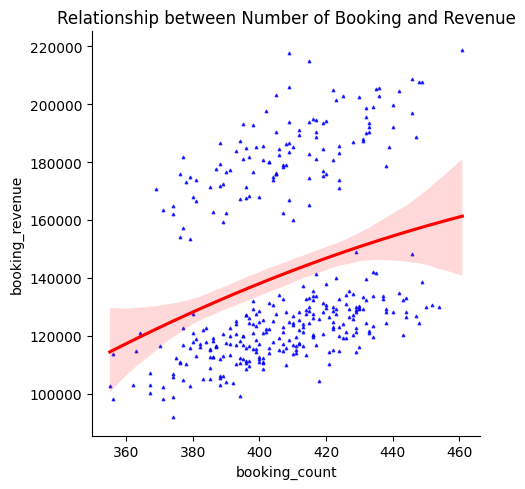

In [ ]:
# Additionally, we can take a look at the relationship between count and revenue (sum value)
plt.figure(figsize=(20,10))
sns.lmplot(
    data = date_stats,
    x = 'booking_count',
    y='booking_revenue',
    order=2,
    markers = '^',
    scatter_kws = {'s':3, 'color': 'blue'},
    line_kws={'color':'red'}
)
plt.title('Relationship between Number of Booking and Revenue')
plt.tight_layout()

##### d. Time with the highest Booking/Revenue

In [ ]:
time_group = ncr.groupby('time')

time_booking_count = time_group.booking_id.count()

time_booking_revenue = time_group.booking_value.sum()

time_stats = pd.DataFrame({
    'Booking_count': time_booking_count,
    'Booking_revenue': time_booking_revenue
}).reset_index()

time_stats

,time,Booking_count,Booking_revenue
0,00,1365,475149.0
1,01,1347,463092.0
2,02,1321,469946.0
3,03,1374,466389.0
4,04,1311,451568.0
5,05,2764,925507.0
6,06,4129,1455280.0
7,07,5401,1834275.0
8,08,6806,2369929.0
9,09,8170,2870280.0


In [ ]:
top5_time = time_stats.sort_values('Booking_revenue', ascending=False).head(5)
least5_time = time_stats.sort_values('Booking_revenue').head(5)

<Axes: xlabel='Booking_revenue', ylabel='time'>

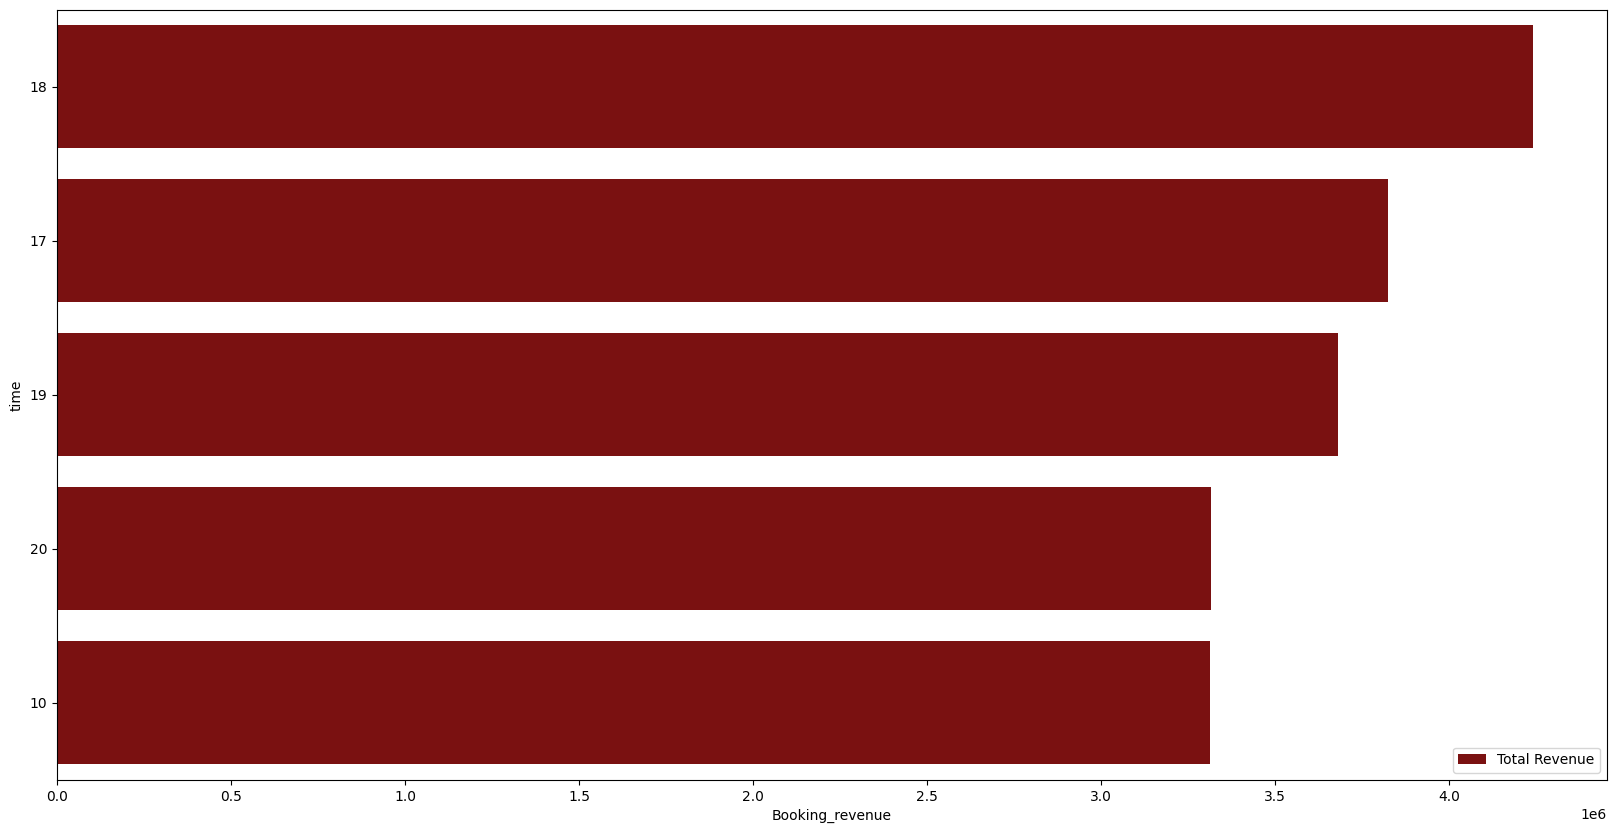

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(
    data = top5_time,
    x='Booking_revenue',
    y='time',
    label = 'Total Revenue',
    color = 'Darkred'
)

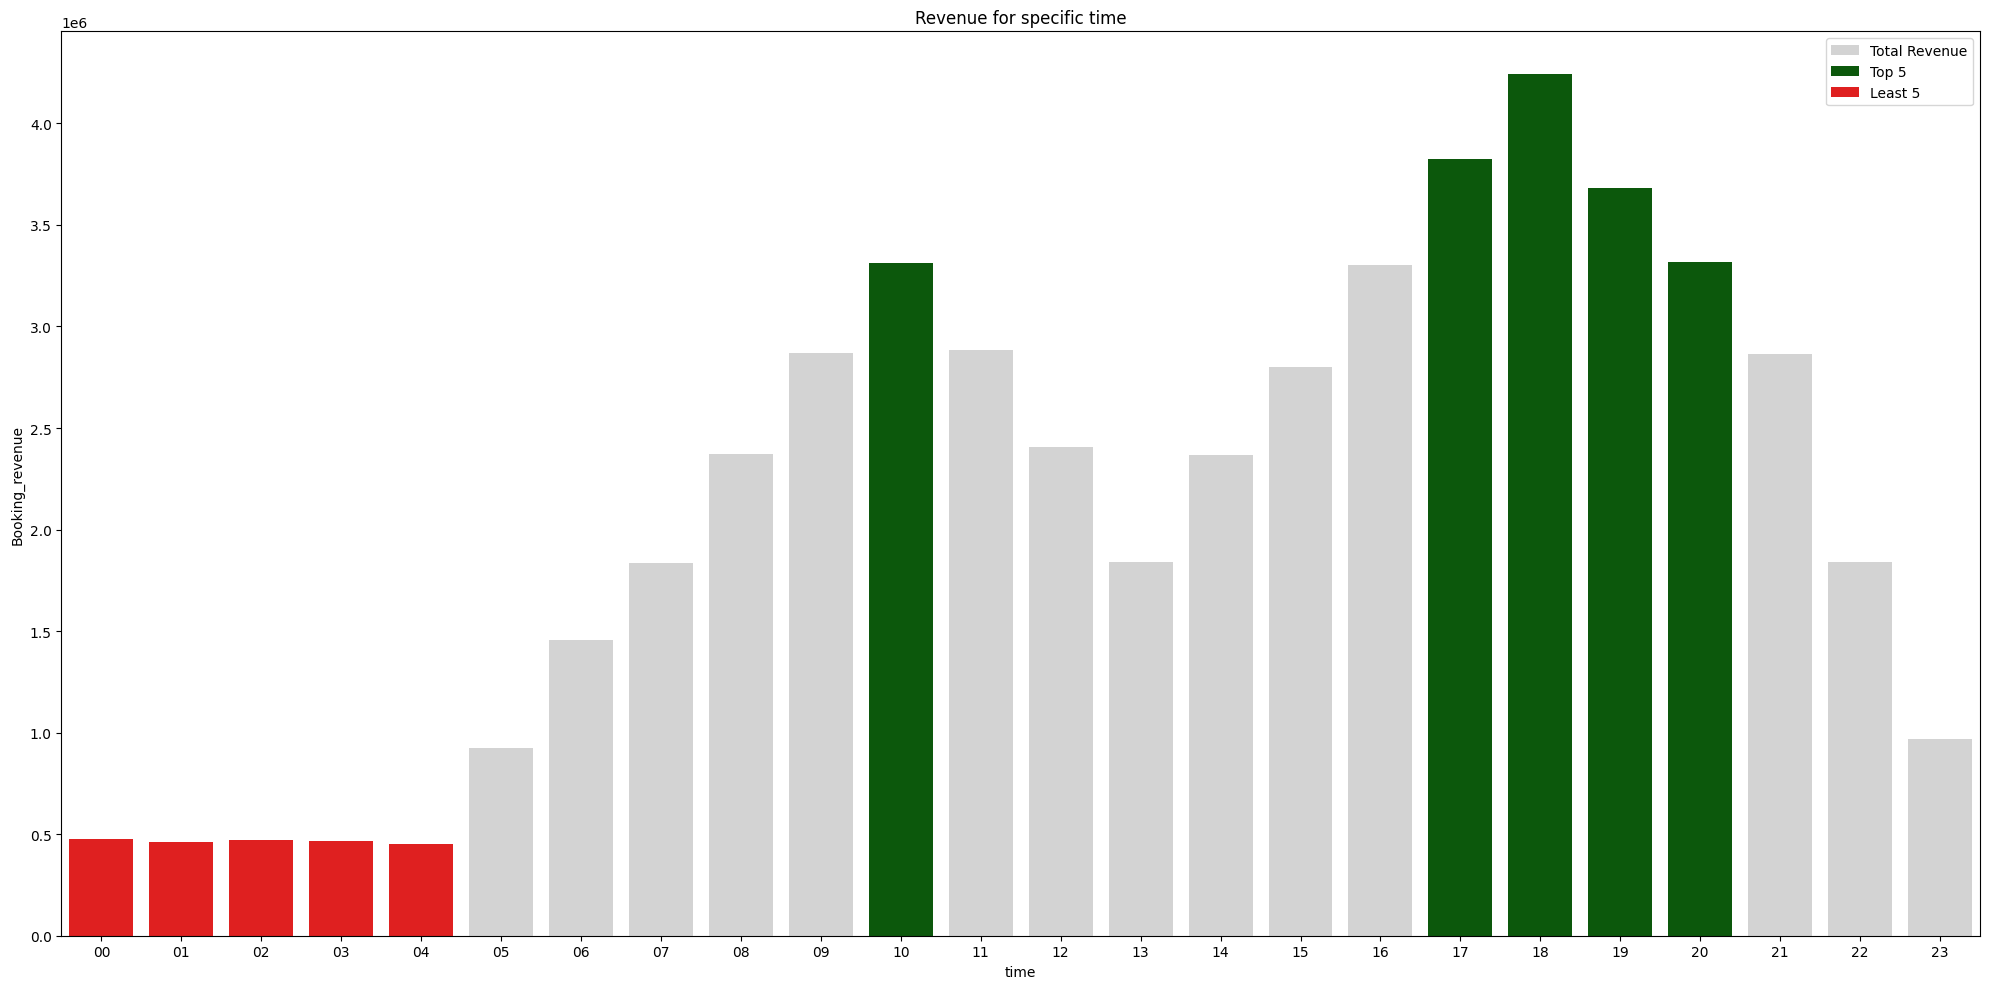

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(
    data=time_stats,
    x='time',
    y='Booking_revenue',
    label='Total Revenue',
    color='Lightgrey'
)
sns.barplot(
    data = top5_time,
    x='time',
    y='Booking_revenue',
    label = 'Top 5',
    color = 'Darkgreen'
)
sns.barplot(
    data = least5_time,
    x='time',
    y='Booking_revenue',
    label = 'Least 5',
    color = 'Red'
)
plt.title('Revenue for specific time')
plt.tight_layout()

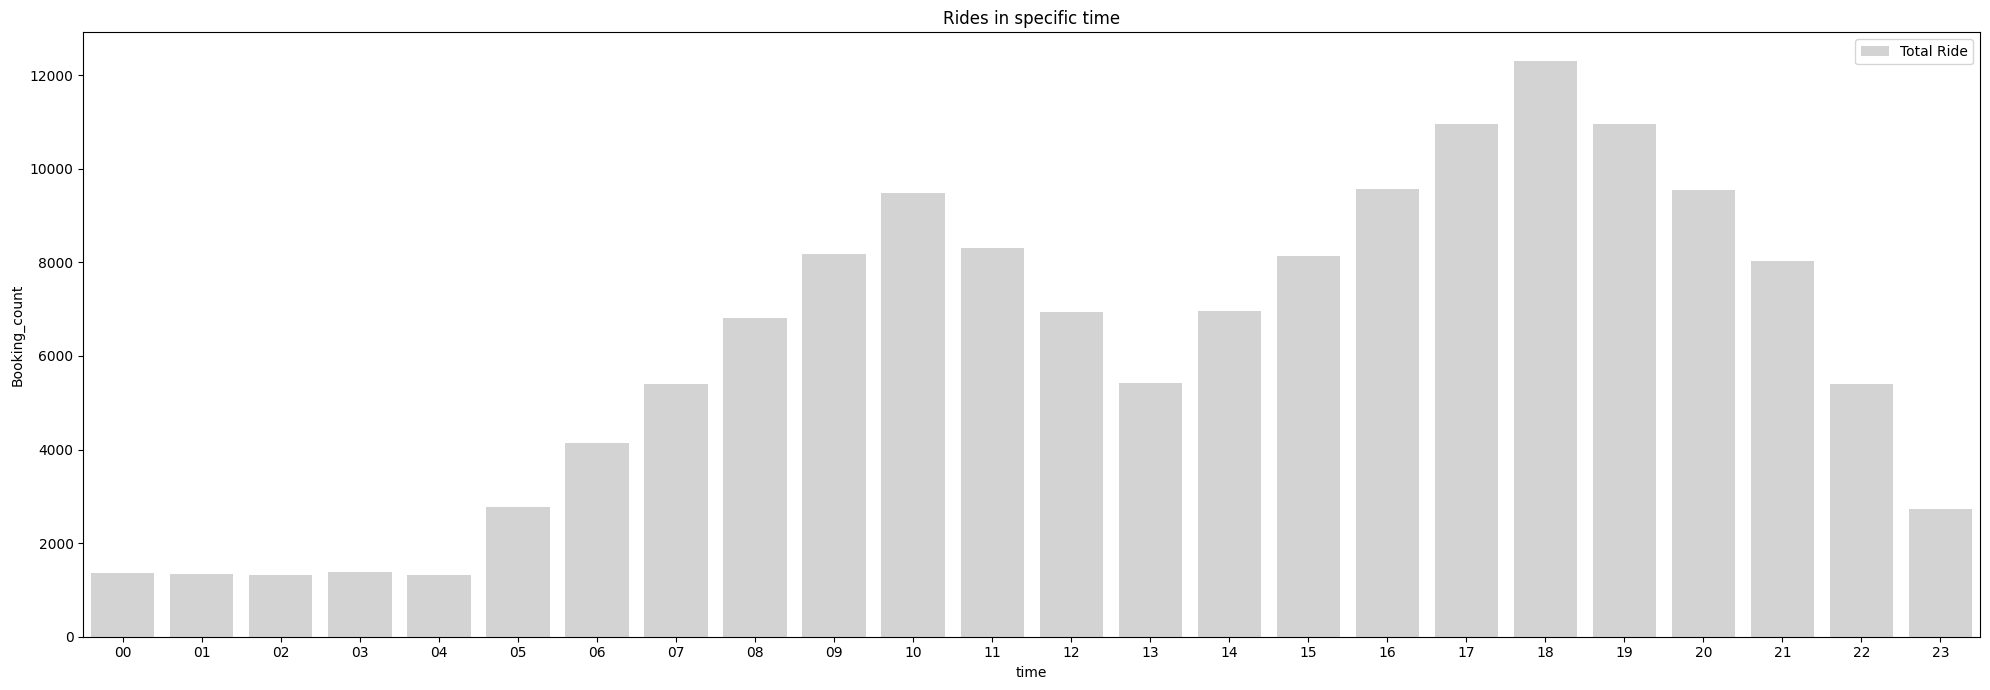

In [ ]:
plt.figure(figsize=(20,7))
sns.barplot(
    data = time_stats,
    x='time',
    y='Booking_count',
    label = 'Total Ride',
    color = 'Lightgrey'
)
plt.title('Rides in specific time')
plt.tight_layout()

# We can somewhat tell that the same trend will goes with the number of rides

####2. Cancellation:

*   Number/Percentage of each type of cancellation
*   Reason for cancelling by Customer/Driver Cancellation Reason/Incomplete Rides Reason proportion
*   Time with most cancellation

##### a. Reason for cancelling by Customer/Driver Cancellation Reason/Incomplete Rides Reason proportion

In [ ]:
ncr.booking_status.value_counts()

,count
booking_status,
completed,92248
cancelled by driver,26789
cancelled by customer,10402
no driver found,10401
incomplete,8927


In [ ]:
not_complete = ncr[ncr['booking_status'] != 'completed']
not_complete

,date,time,booking_id,booking_status,customer_id,vehicle_type,pickup_location,drop_location,avg_vtat,avg_ctat,...,reason_for_cancelling_by_customer,cancelled_rides_by_driver,driver_cancellation_reason,incomplete_rides,incomplete_rides_reason,booking_value,ride_distance,driver_ratings,customer_rating,payment_method
0,2024-03-23,12,CNR5884300,no driver found,CID1982111,eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18,CNR1326809,incomplete,CID4604802,Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,0.0,NaN,1.0,vehicle breakdown,237.0,5.73,NaN,NaN,UPI
8,2024-09-14,12,CNR4510807,no driver found,CID7873618,Go Sedan,Noida Sector 62,Noida Sector 18,NaN,NaN,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
9,2024-12-16,19,CNR7721892,incomplete,CID5214275,Auto,Rohini,Adarsh Nagar,6.1,26.0,...,NaN,0.0,NaN,1.0,other issue,135.0,10.36,NaN,NaN,Cash
11,2024-09-18,08,CNR9551927,no driver found,CID7568143,Auto,Vidhan Sabha,AIIMS,NaN,NaN,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149980,2024-12-10,15,CNR6231822,no driver found,CID6232718,Premier Sedan,Kirti Nagar,Sarojini Nagar,NaN,NaN,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
149982,2024-11-13,06,CNR4448255,no driver found,CID9138957,Auto,Sikanderpur,Old Gurgaon,NaN,NaN,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
149984,2024-01-14,15,CNR2761999,incomplete,CID3743304,Go Sedan,Azadpur,Lajpat Nagar,5.9,12.8,...,NaN,0.0,NaN,1.0,customer demand,1146.0,13.96,NaN,NaN,Cash
149990,2024-09-26,12,CNR3212810,cancelled by driver,CID6199171,Auto,Kashmere Gate ISBT,GTB Nagar,10.7,NaN,...,NaN,1.0,personal & car related issues,0.0,NaN,NaN,NaN,NaN,NaN,NaN


array([[<Axes: title={'center': 'avg_vtat'}>,
        <Axes: title={'center': 'avg_ctat'}>,
        <Axes: title={'center': 'cancelled_rides_by_customer'}>],
       [<Axes: title={'center': 'cancelled_rides_by_driver'}>,
        <Axes: title={'center': 'incomplete_rides'}>,
        <Axes: title={'center': 'booking_value'}>],
       [<Axes: title={'center': 'ride_distance'}>,
        <Axes: title={'center': 'driver_ratings'}>,
        <Axes: title={'center': 'customer_rating'}>]], dtype=object)

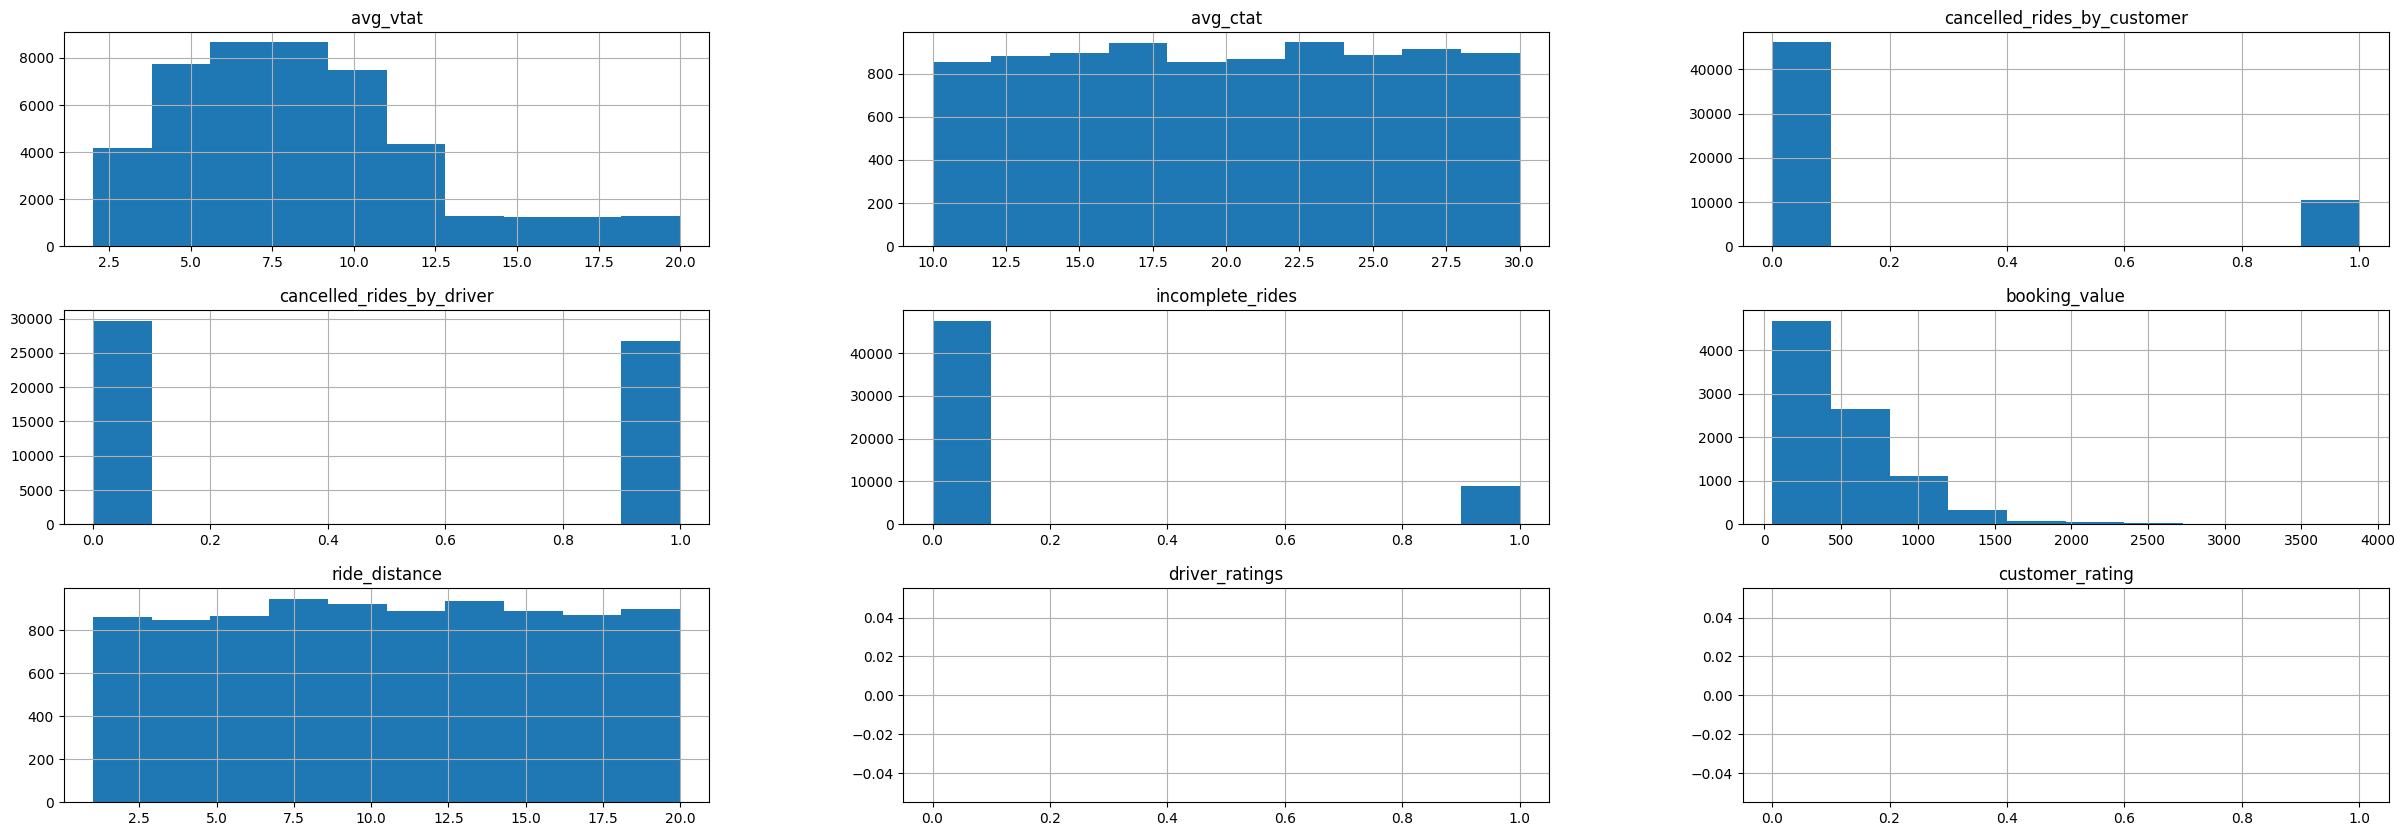

In [ ]:
not_complete.hist(figsize=(30,10))

In [ ]:
def no_ride(df):
  df['can not find driver'] = (not_complete.booking_status == 'no driver found').astype(float)
  return df

no_ride(not_complete)

/tmp/ipython-input-741751306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['can not find driver'] = (not_complete.booking_status == 'no driver found').astype(float)


,date,time,booking_id,booking_status,customer_id,vehicle_type,pickup_location,drop_location,avg_vtat,avg_ctat,...,cancelled_rides_by_driver,driver_cancellation_reason,incomplete_rides,incomplete_rides_reason,booking_value,ride_distance,driver_ratings,customer_rating,payment_method,can not find driver
0,2024-03-23,12,CNR5884300,no driver found,CID1982111,eBike,Palam Vihar,Jhilmil,NaN,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,2024-11-29,18,CNR1326809,incomplete,CID4604802,Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,0.0,NaN,1.0,vehicle breakdown,237.0,5.73,NaN,NaN,UPI,0.0
8,2024-09-14,12,CNR4510807,no driver found,CID7873618,Go Sedan,Noida Sector 62,Noida Sector 18,NaN,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
9,2024-12-16,19,CNR7721892,incomplete,CID5214275,Auto,Rohini,Adarsh Nagar,6.1,26.0,...,0.0,NaN,1.0,other issue,135.0,10.36,NaN,NaN,Cash,0.0
11,2024-09-18,08,CNR9551927,no driver found,CID7568143,Auto,Vidhan Sabha,AIIMS,NaN,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149980,2024-12-10,15,CNR6231822,no driver found,CID6232718,Premier Sedan,Kirti Nagar,Sarojini Nagar,NaN,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
149982,2024-11-13,06,CNR4448255,no driver found,CID9138957,Auto,Sikanderpur,Old Gurgaon,NaN,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
149984,2024-01-14,15,CNR2761999,incomplete,CID3743304,Go Sedan,Azadpur,Lajpat Nagar,5.9,12.8,...,0.0,NaN,1.0,customer demand,1146.0,13.96,NaN,NaN,Cash,0.0
149990,2024-09-26,12,CNR3212810,cancelled by driver,CID6199171,Auto,Kashmere Gate ISBT,GTB Nagar,10.7,NaN,...,1.0,personal & car related issues,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
not_complete.loc[:,['booking_status','cancelled_rides_by_customer','cancelled_rides_by_driver','incomplete_rides','can not find driver']]

,booking_status,cancelled_rides_by_customer,cancelled_rides_by_driver,incomplete_rides,can not find driver
0,no driver found,0.0,0.0,0.0,1.0
1,incomplete,0.0,0.0,1.0,0.0
8,no driver found,0.0,0.0,0.0,1.0
9,incomplete,0.0,0.0,1.0,0.0
11,no driver found,0.0,0.0,0.0,1.0
...,...,...,...,...,...
149980,no driver found,0.0,0.0,0.0,1.0
149982,no driver found,0.0,0.0,0.0,1.0
149984,incomplete,0.0,0.0,1.0,0.0
149990,cancelled by driver,0.0,1.0,0.0,0.0


In [ ]:
status = not_complete.groupby('booking_status')
status_count = not_complete.booking_status.value_counts().reset_index()
status_count

,booking_status,count
0,cancelled by driver,26789
1,cancelled by customer,10402
2,no driver found,10401
3,incomplete,8927


/tmp/ipython-input-2413698906.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


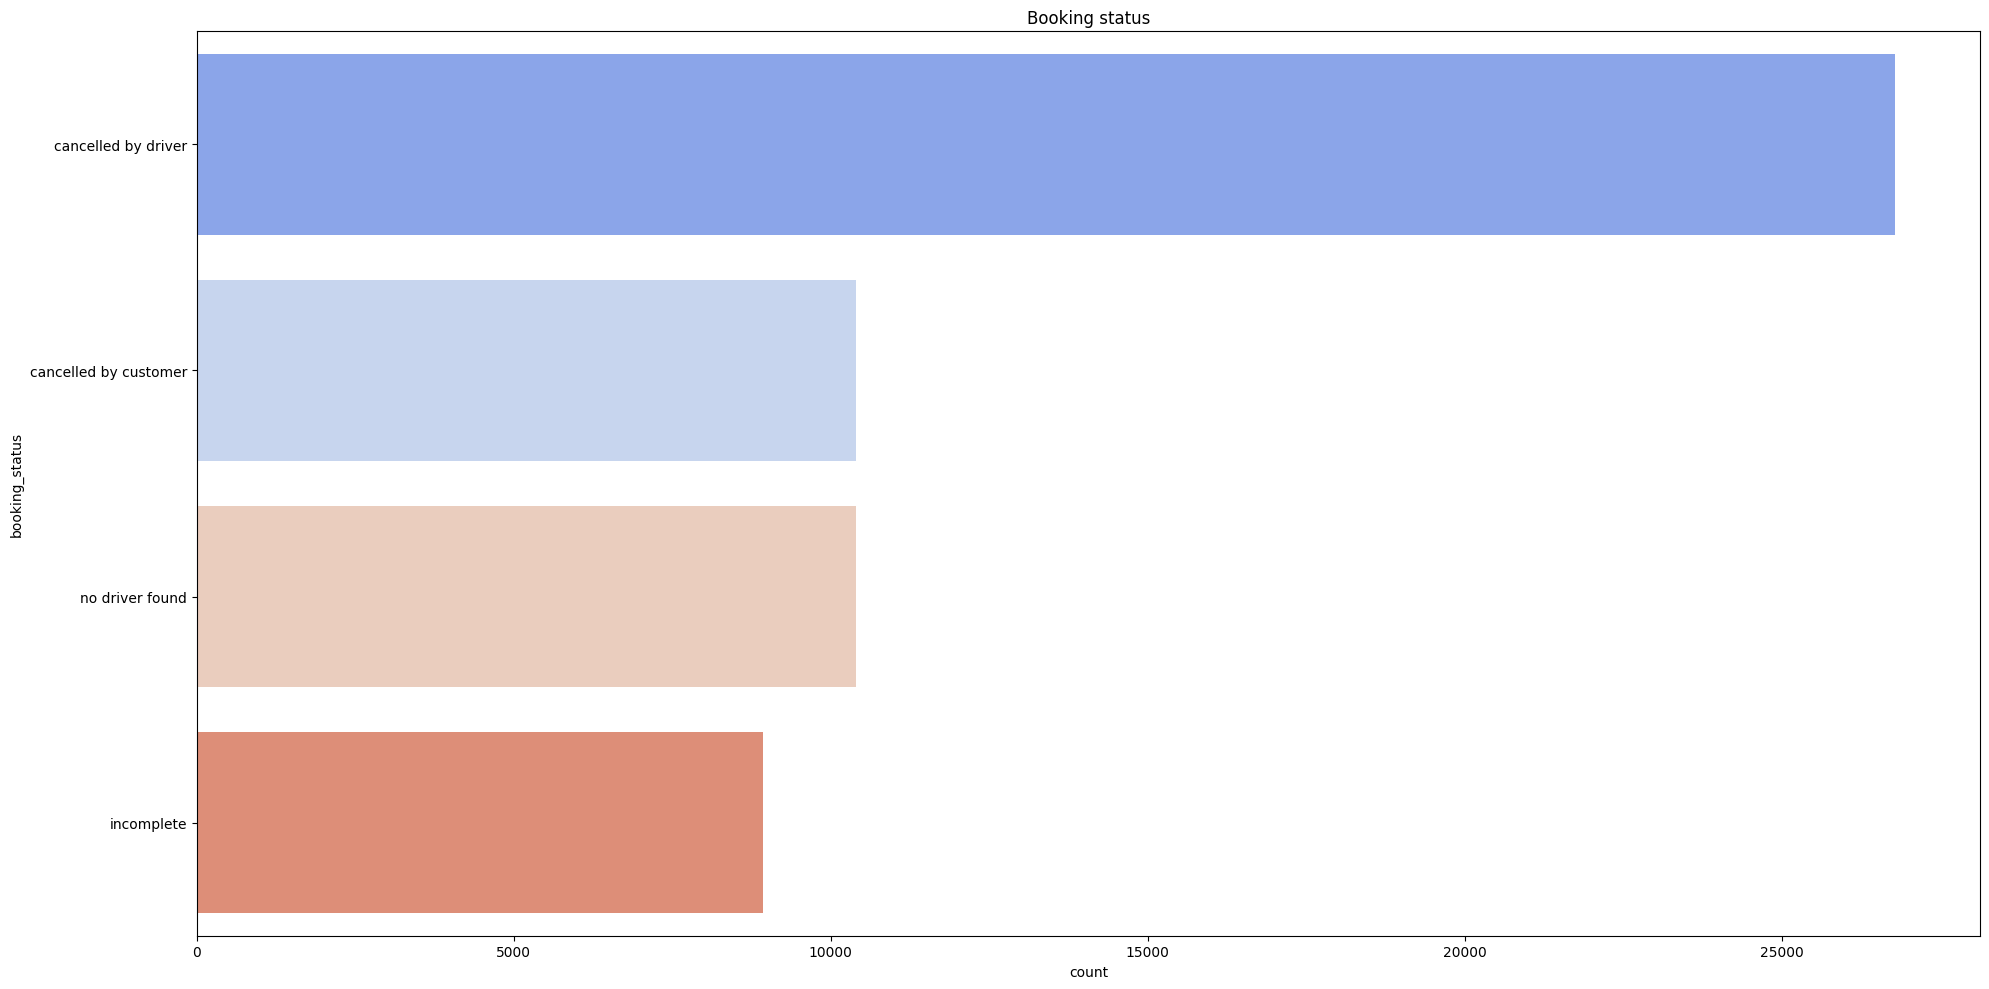

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(
    data = status_count,
    y= 'booking_status',
    x= 'count',
    palette='coolwarm'
)
plt.title('Booking status')
plt.tight_layout()

In [ ]:
driver_cancel = not_complete.driver_cancellation_reason.value_counts().reset_index()
customer_cancel = not_complete.reason_for_cancelling_by_customer.value_counts().reset_index()
incomplete_reason = not_complete.incomplete_rides_reason.value_counts().reset_index()

In [ ]:
driver_cancel

,driver_cancellation_reason,count
0,customer related issue,6777
1,the customer was coughing/sick,6693
2,personal & car related issues,6675
3,more than permitted people in there,6644


In [ ]:
customer_cancel

,reason_for_cancelling_by_customer,count
0,wrong address,2348
1,change of plans,2326
2,driver is not moving towards pickup location,2315
3,driver asked to cancel,2274
4,ac is not working,1139


In [ ]:
incomplete_reason

,incomplete_rides_reason,count
0,customer demand,3015
1,vehicle breakdown,2993
2,other issue,2919


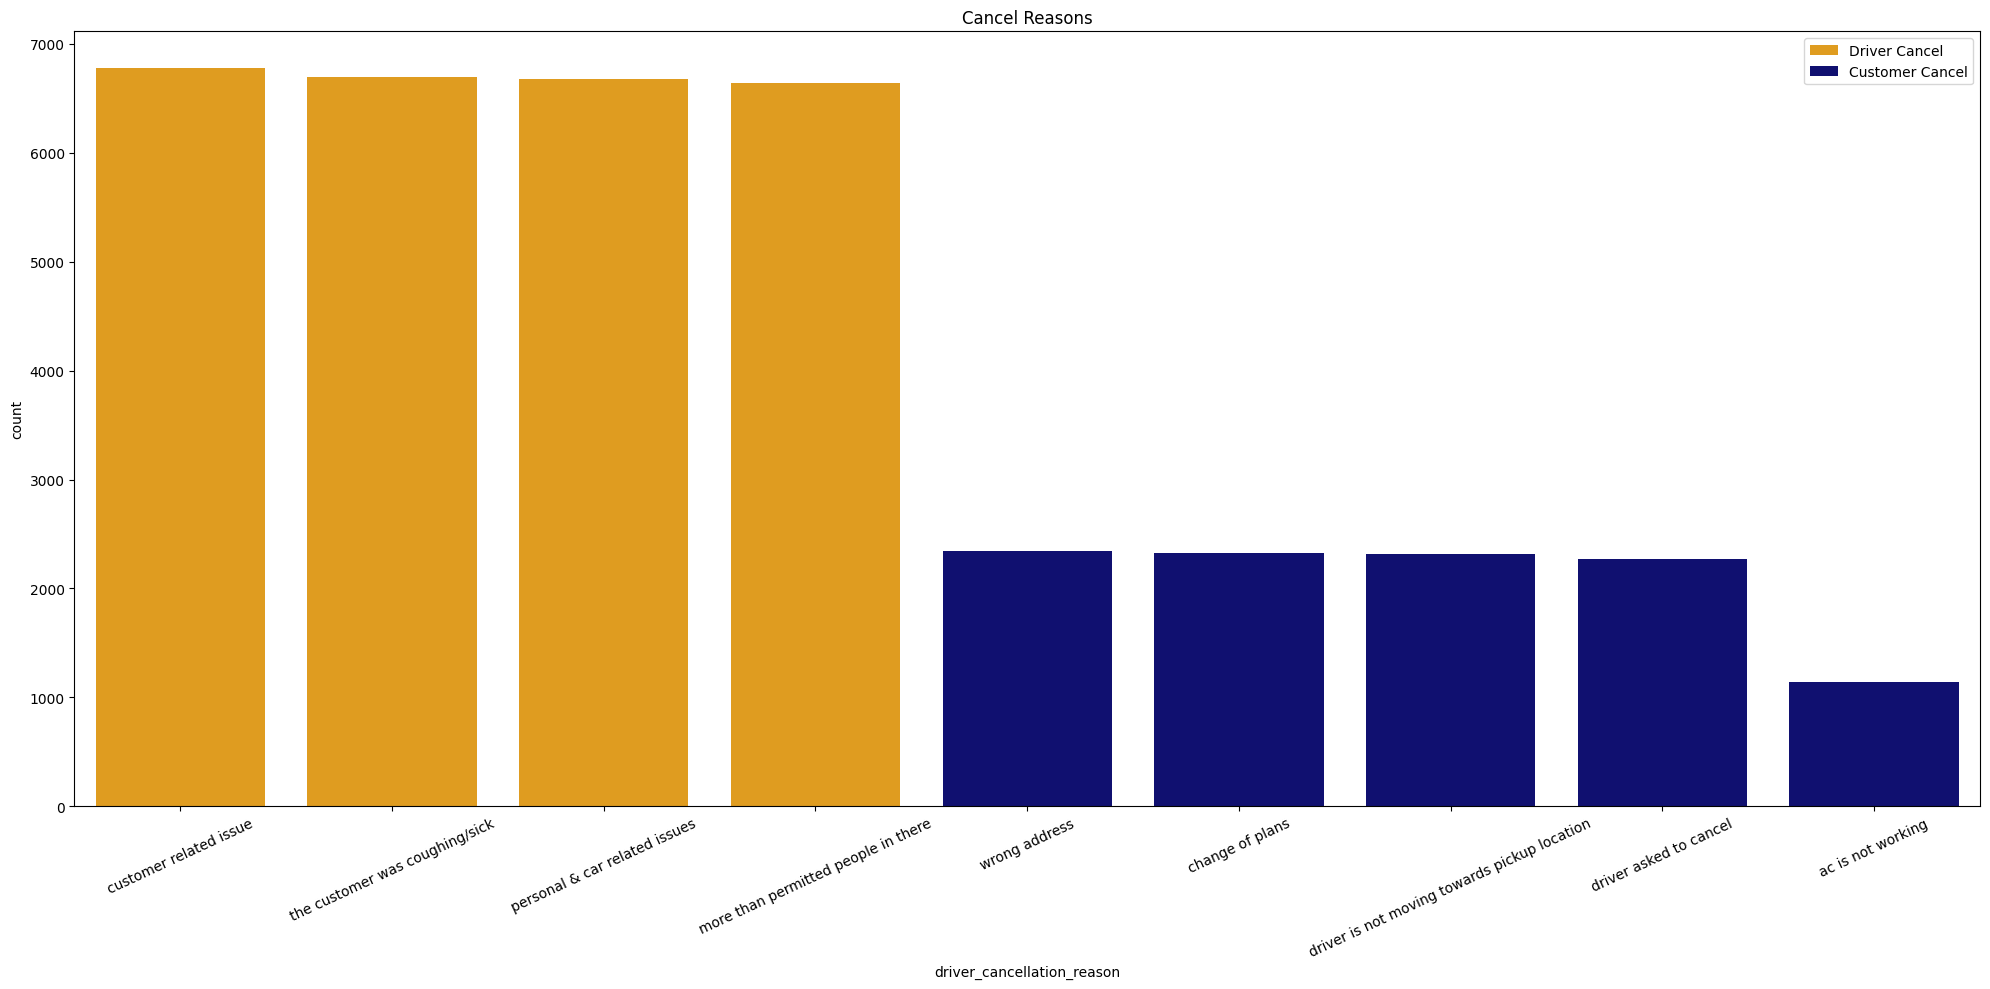

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(
    data = driver_cancel,
    x = 'driver_cancellation_reason',
    y = 'count',
    label = 'Driver Cancel',
    color ='Orange'
)
sns.barplot(
    data = customer_cancel,
    x= 'reason_for_cancelling_by_customer',
    y = 'count',
    label = 'Customer Cancel',
    color = 'Navy'
)
plt.title('Cancel Reasons')
plt.legend()
plt.xticks(rotation = 25)
plt.tight_layout()

/tmp/ipython-input-3120354025.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


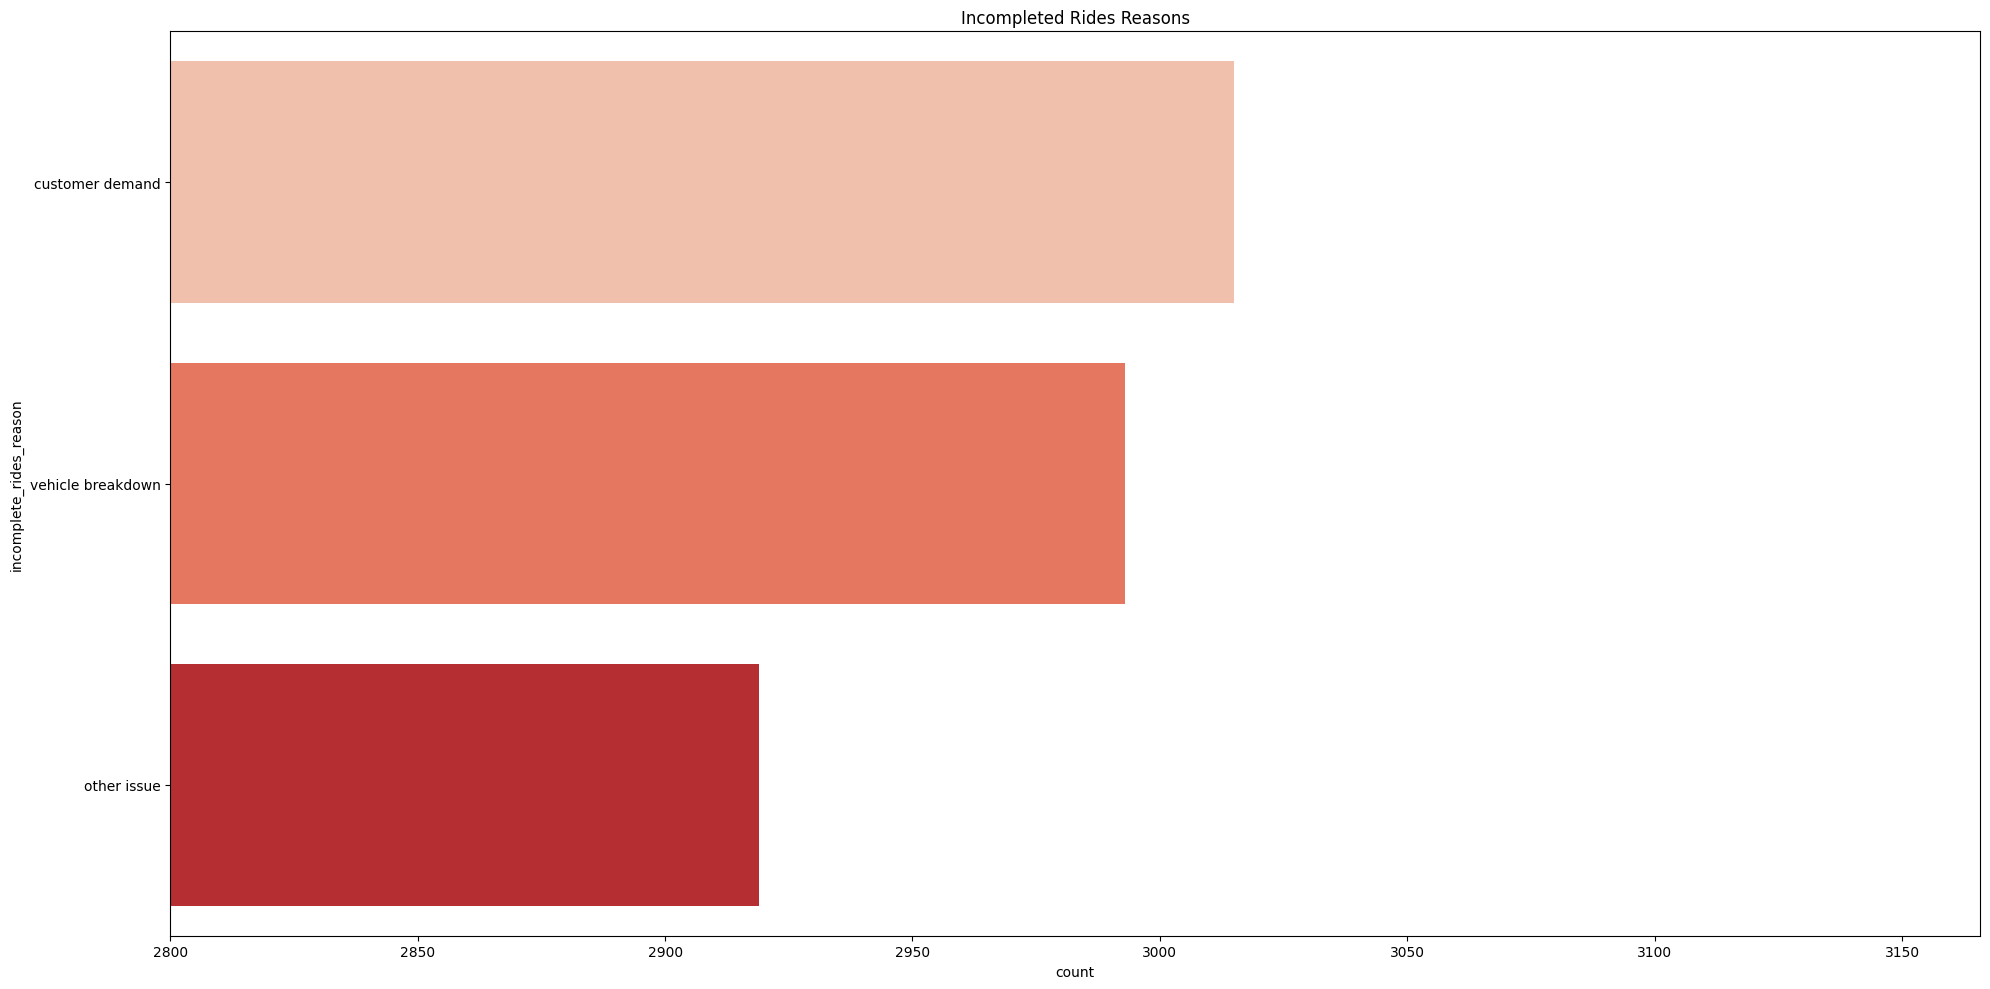

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(
    data=incomplete_reason,
    x= 'count',
    y= 'incomplete_rides_reason',
    palette='Reds'
)
plt.title('Incompleted Rides Reasons')
plt.xlim(2800,)
plt.tight_layout()

In [ ]:
# One thing worth mentioning is the fact that incompleted ride still have booking_value, which is understandable
# So it might be useful to calculate the total booking value of rides that were incompleted

incomplete_value = not_complete.booking_value[not_complete['booking_status']=='incomplete'].sum()
all_value = ncr.booking_value.sum()

incomplete_value/all_value

np.float64(0.08841554191064706)

##### b. Time with most cancellation

In [ ]:
not_complete[not_complete['booking_status']!='completed']

,date,time,booking_id,booking_status,customer_id,vehicle_type,pickup_location,drop_location,avg_vtat,avg_ctat,...,cancelled_rides_by_driver,driver_cancellation_reason,incomplete_rides,incomplete_rides_reason,booking_value,ride_distance,driver_ratings,customer_rating,payment_method,can not find driver
0,2024-03-23,12,CNR5884300,no driver found,CID1982111,eBike,Palam Vihar,Jhilmil,NaN,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,2024-11-29,18,CNR1326809,incomplete,CID4604802,Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,0.0,NaN,1.0,vehicle breakdown,237.0,5.73,NaN,NaN,UPI,0.0
8,2024-09-14,12,CNR4510807,no driver found,CID7873618,Go Sedan,Noida Sector 62,Noida Sector 18,NaN,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
9,2024-12-16,19,CNR7721892,incomplete,CID5214275,Auto,Rohini,Adarsh Nagar,6.1,26.0,...,0.0,NaN,1.0,other issue,135.0,10.36,NaN,NaN,Cash,0.0
11,2024-09-18,08,CNR9551927,no driver found,CID7568143,Auto,Vidhan Sabha,AIIMS,NaN,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149980,2024-12-10,15,CNR6231822,no driver found,CID6232718,Premier Sedan,Kirti Nagar,Sarojini Nagar,NaN,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
149982,2024-11-13,06,CNR4448255,no driver found,CID9138957,Auto,Sikanderpur,Old Gurgaon,NaN,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
149984,2024-01-14,15,CNR2761999,incomplete,CID3743304,Go Sedan,Azadpur,Lajpat Nagar,5.9,12.8,...,0.0,NaN,1.0,customer demand,1146.0,13.96,NaN,NaN,Cash,0.0
149990,2024-09-26,12,CNR3212810,cancelled by driver,CID6199171,Auto,Kashmere Gate ISBT,GTB Nagar,10.7,NaN,...,1.0,personal & car related issues,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
time_cancel_overall = not_complete.groupby('time')
time_cancel_overall_vit = time_cancel_overall.booking_id.count().reset_index()

time_cancel_overall_vit.sort_values('booking_id', ascending=False)

,time,booking_id
18,18,4729
19,19,4218
17,17,4158
16,16,3633
20,20,3594
10,10,3565
9,09,3126
15,15,3117
11,11,3101
21,21,2968


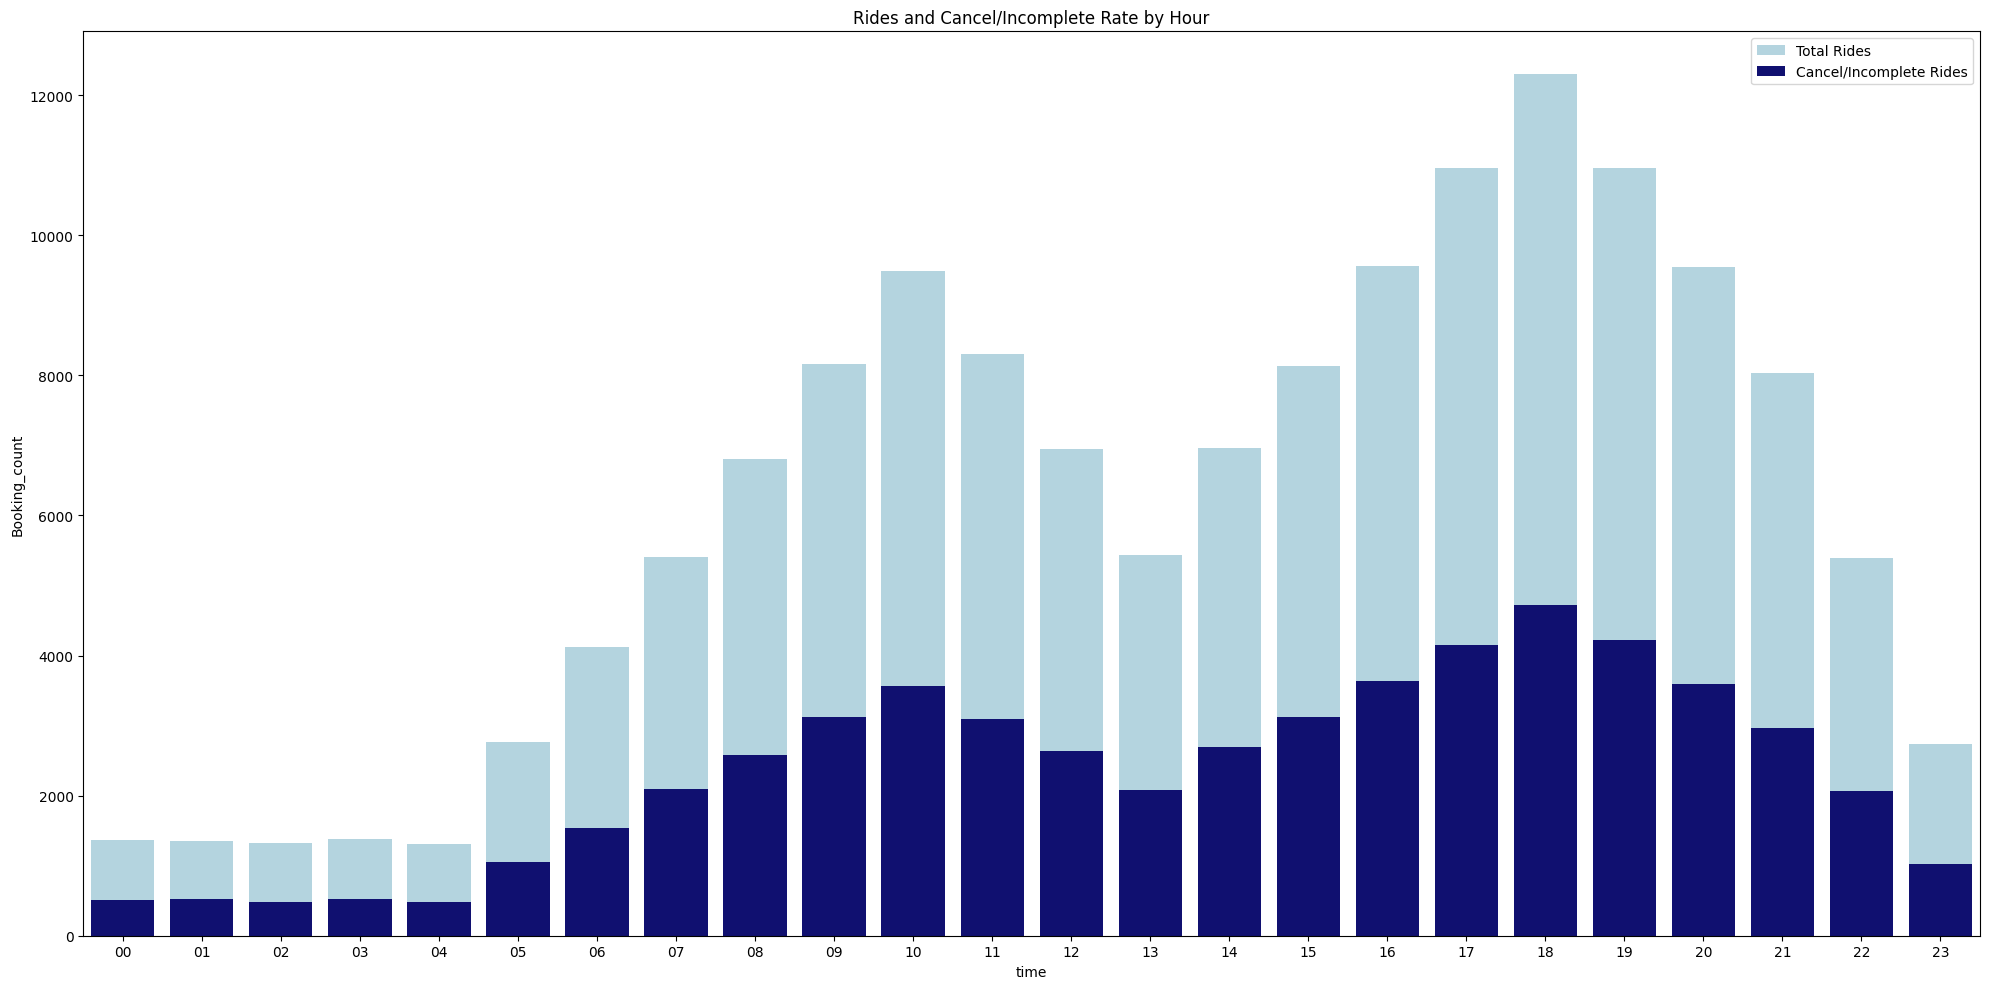

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(
    data = time_stats,
    x='time',
    y='Booking_count',
    label = 'Total Rides',
    color = 'Lightblue'
)
sns.barplot(
    data = time_cancel_overall_vit,
    x= 'time',
    y= 'booking_id',
    color = 'Navy',
    label = 'Cancel/Incomplete Rides'
)
plt.title('Rides and Cancel/Incomplete Rate by Hour')
plt.tight_layout()

In [ ]:
# This table can show Cancel/Incomplete Rides by each status
time_cancel = not_complete.groupby(['time','booking_status'])
time_cancel.booking_id.count().reset_index().sort_values('booking_id', ascending= False)

,time,booking_status,booking_id
73,18,cancelled by driver,2233
69,17,cancelled by driver,1994
77,19,cancelled by driver,1986
81,20,cancelled by driver,1719
65,16,cancelled by driver,1714
...,...,...,...
2,00,incomplete,82
6,01,incomplete,75
8,02,cancelled by customer,73
14,03,incomplete,69


##### c. How VTAT affects the cancellation/Incompletion rate

In [ ]:
ncr.select_dtypes('number').corr()

# Based on this, we can see a strong connection between:
# cancelled_rides_by_customer vs avg_vtat
# incompleted_rides vs avg_ctat
# incompleted_rides vs ride_distance

,avg_vtat,avg_ctat,cancelled_rides_by_customer,cancelled_rides_by_driver,incomplete_rides,booking_value,ride_distance,driver_ratings,customer_rating
avg_vtat,1.000000,0.062454,0.306444,-0.124024,-0.170356,0.002310,0.063018,-0.005255,-0.004442
avg_ctat,0.062454,1.000000,NaN,NaN,-0.319393,0.000267,0.101506,0.001129,0.001349
cancelled_rides_by_customer,0.306444,NaN,1.000000,-0.128494,-0.069276,NaN,NaN,NaN,NaN
cancelled_rides_by_driver,-0.124024,NaN,-0.128494,1.000000,-0.118406,NaN,NaN,NaN,NaN
incomplete_rides,-0.170356,-0.319393,-0.069276,-0.118406,1.000000,0.000825,-0.313093,NaN,NaN
booking_value,0.002310,0.000267,NaN,NaN,0.000825,1.000000,0.005129,-0.000175,-0.000553
ride_distance,0.063018,0.101506,NaN,NaN,-0.313093,0.005129,1.000000,-0.001857,0.004358
driver_ratings,-0.005255,0.001129,NaN,NaN,NaN,-0.000175,-0.001857,1.000000,-0.000773
customer_rating,-0.004442,0.001349,NaN,NaN,NaN,-0.000553,0.004358,-0.000773,1.000000


In [ ]:
ncr[ncr['cancelled_rides_by_customer']==1].avg_ctat

,avg_ctat
18,NaN
39,NaN
46,NaN
62,NaN
78,NaN
...,...
149943,NaN
149952,NaN
149956,NaN
149963,NaN


In [ ]:
ncr.describe()

,avg_vtat,avg_ctat,cancelled_rides_by_customer,cancelled_rides_by_driver,incomplete_rides,booking_value,ride_distance,driver_ratings,customer_rating
count,138366.000000,101175.000000,148767.000000,148767.000000,148767.000000,101175.000000,101175.000000,92248.000000,92248.000000
mean,8.454819,29.150249,0.069921,0.180074,0.060007,508.290230,24.640956,4.230756,4.404301
std,3.773341,8.901703,0.255015,0.384250,0.237500,395.913208,14.002172,0.436741,0.437908
min,2.000000,10.000000,0.000000,0.000000,0.000000,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,0.000000,0.000000,0.000000,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,0.000000,0.000000,0.000000,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,0.000000,0.000000,0.000000,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.000000,1.000000,1.000000,4277.000000,50.000000,5.000000,5.000000


<Figure size 2000x1000 with 0 Axes>

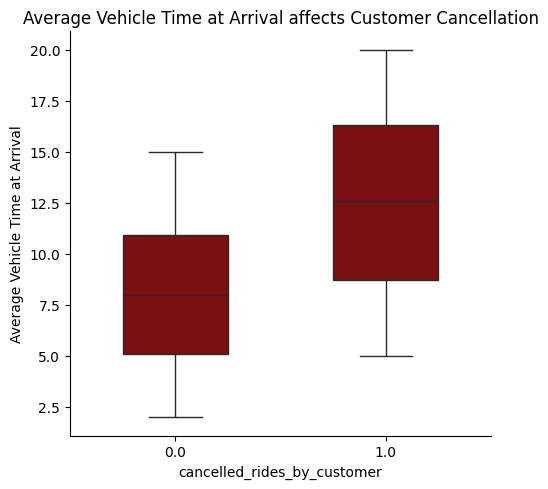

In [ ]:
plt.figure(figsize=(20,10))
sns.catplot(
    data = ncr,
    kind = 'box',
    x = 'cancelled_rides_by_customer',
    y = 'avg_vtat',
    width = 0.5,
    color = 'darkred'
)
plt.title('Average Vehicle Time at Arrival affects Customer Cancellation')
plt.ylabel('Average Vehicle Time at Arrival')
plt.tight_layout()

# Based on this plot, we can tell the if the waiting time is around 7.8 minutes,
# The customer tends to not cancel the trip
# Around 12.5 minutes waiting can lead to customer cancellation

# This is understandable because Customers do not want to wait for so long

<Figure size 2000x1000 with 0 Axes>

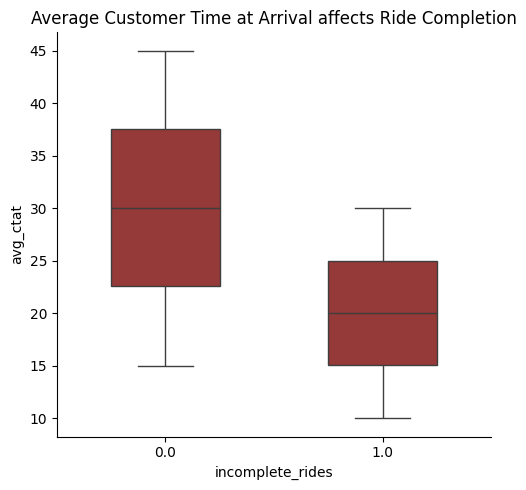

In [ ]:
plt.figure(figsize=(20,10))
sns.catplot(
    data = ncr,
    kind = 'box',
    x = 'incomplete_rides',
    y = 'avg_ctat',
    color = 'brown',
    width = 0.5
)
plt.title('Average Customer Time at Arrival affects Ride Completion')
plt.tight_layout()

# We can tell that the ride will more likely to be completed
# if the time waiting for customer around 30 minutes, and more likely
# to be incomplete if the waiting time around 20

<Figure size 2000x1000 with 0 Axes>

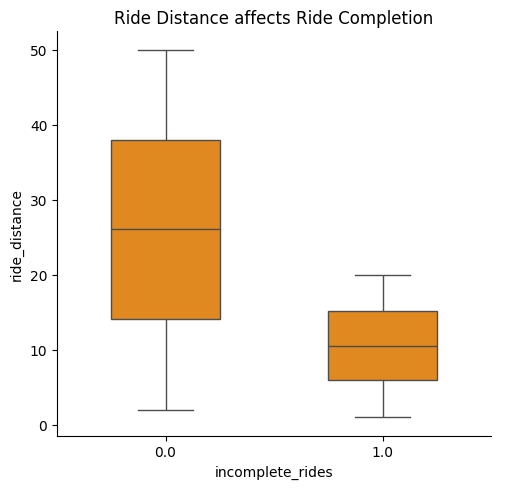

In [ ]:
plt.figure(figsize=(20,10))
sns.catplot(
    data = ncr,
    kind = 'box',
    x = 'incomplete_rides',
    y = 'ride_distance',
    width = 0.5,
    color = 'darkorange'
)
plt.title('Ride Distance affects Ride Completion')
plt.tight_layout()

# We can tell that customer tends to stay till the end of the ride if the distance
# are long (around 26), but stop around 10
# Based on this, we can make a guess that: Incompleted rides are tracked based on
# the distance from the starting destination to the stop destination

####3. Ride Location/Distance:
- What destination have the most pickup, drop
- What destination have the highest cancellation
- Average drive length

##### a. What destination have the most Pickup, Drop

In [ ]:
ncr.pickup_location.nunique()

176

In [ ]:
top_10_pickup_location = ncr.pickup_location.value_counts().head(10).reset_index()
top_10_pickup_location

,pickup_location,count
0,Khandsa,947
1,Barakhamba Road,939
2,Saket,929
3,Pragati Maidan,912
4,Badarpur,912
5,AIIMS,909
6,Madipur,908
7,Dwarka Sector 21,908
8,Mehrauli,904
9,Pataudi Chowk,901


In [ ]:
top_10_drop_location=ncr.drop_location.value_counts().head(10).reset_index()
top_10_drop_location

,drop_location,count
0,Ashram,930
1,Basai Dhankot,911
2,Lok Kalyan Marg,909
3,Cyber Hub,908
4,Narsinghpur,908
5,Kalkaji,905
6,Udyog Vihar,902
7,Kashmere Gate ISBT,902
8,Lajpat Nagar,900
9,Nehru Place,900


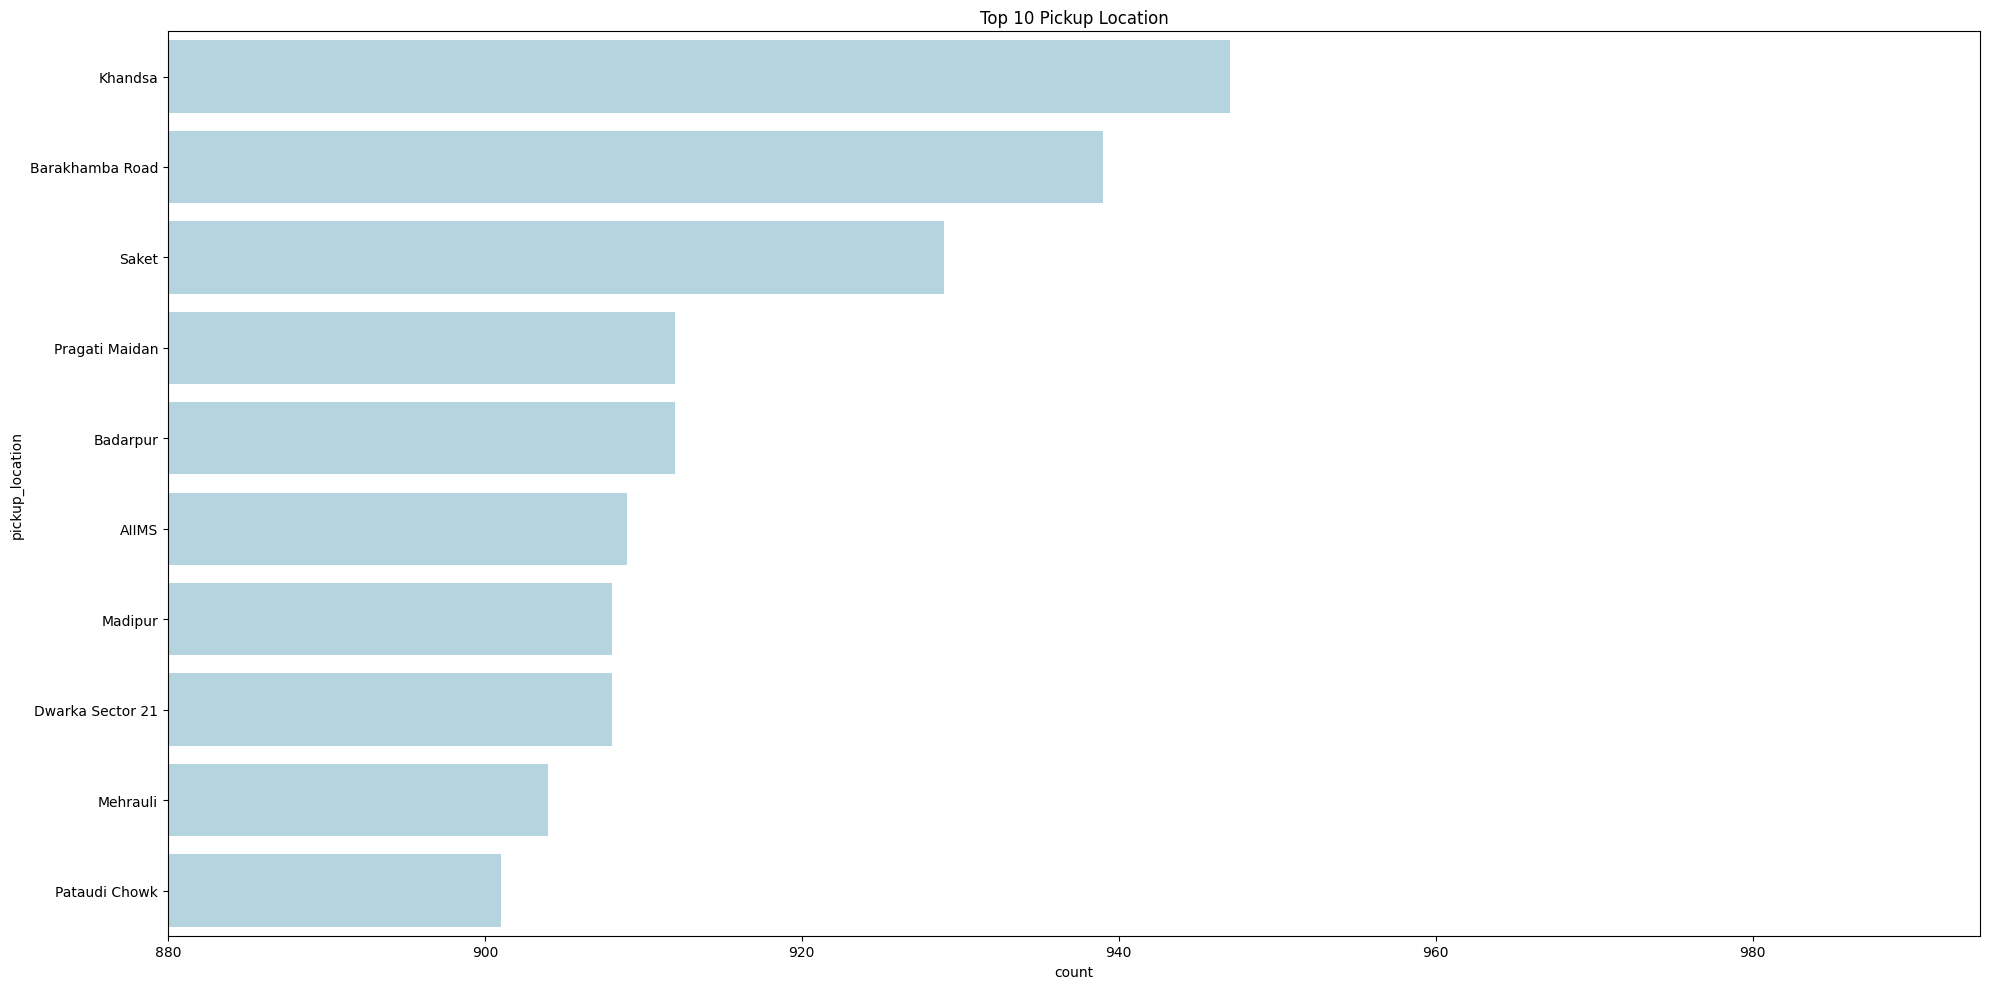

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(
    data = top_10_pickup_location,
    x = 'count',
    y = 'pickup_location',
    color = 'lightblue'
)
plt.title('Top 10 Pickup Location')
plt.xlim(880,None)
plt.tight_layout()

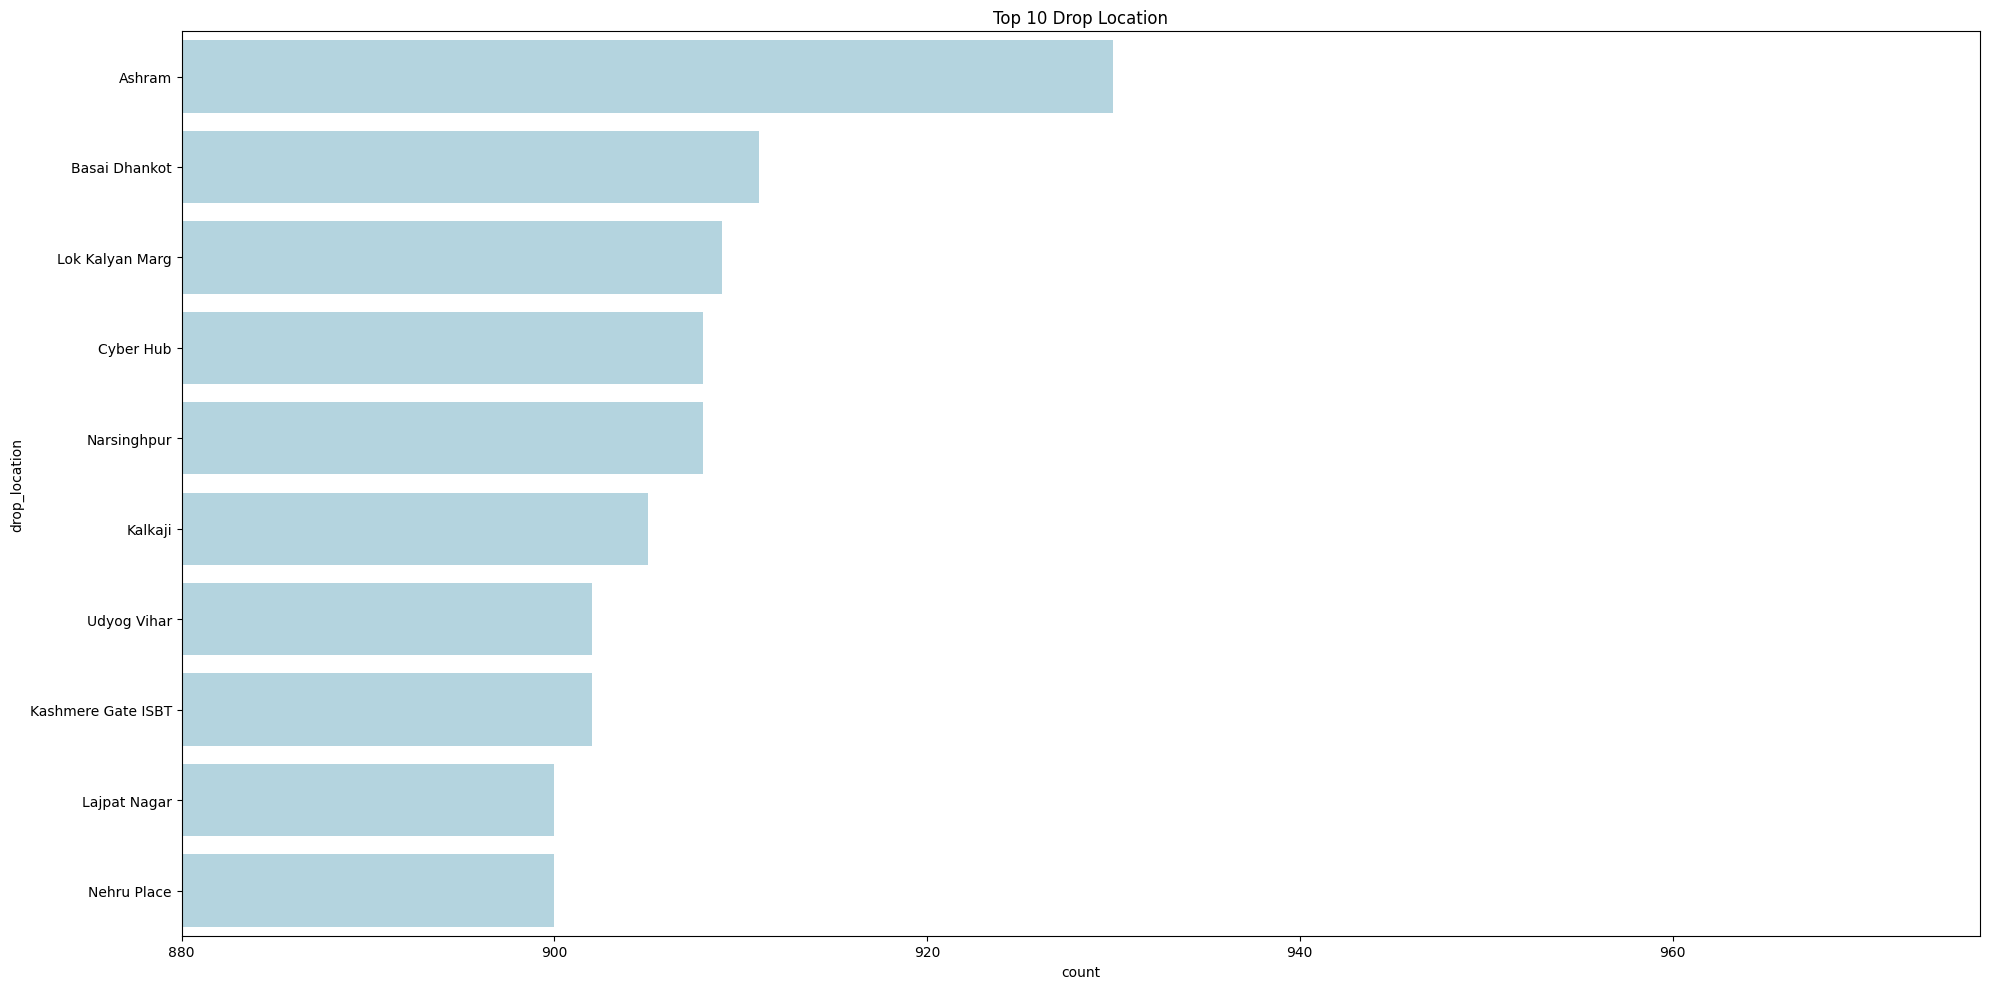

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(
    data = top_10_drop_location,
    x = 'count',
    y = 'drop_location',
    color = 'lightblue'
)
plt.title('Top 10 Drop Location')
plt.xlim(880,None)
plt.tight_layout()

##### b. Pickup locations have highest cancellation rate

In [ ]:
# Specifically for this question, we only want to check for cancellation
# and not including incompelete drive

# This will give us a clear view of how likely a ride can be cancelled, so that
# we can move the driver to other destinations/have strategies to handle those who
# just recently cancelled

In [ ]:
ncr.booking_status.value_counts()

,count
booking_status,
completed,92248
cancelled by driver,26789
cancelled by customer,10402
no driver found,10401
incomplete,8927


In [ ]:
cancelled_ncr = ncr[ncr.booking_status.str.contains('cancelled')]
cancelled_ncr

,date,time,booking_id,booking_status,customer_id,vehicle_type,pickup_location,drop_location,avg_vtat,avg_ctat,...,reason_for_cancelling_by_customer,cancelled_rides_by_driver,driver_cancellation_reason,incomplete_rides,incomplete_rides_reason,booking_value,ride_distance,driver_ratings,customer_rating,payment_method
12,2024-06-25,22,CNR4386945,cancelled by driver,CID5543520,eBike,Patel Chowk,Kherki Daula Toll,4.6,NaN,...,NaN,1.0,personal & car related issues,0.0,NaN,NaN,NaN,NaN,NaN,NaN
17,2024-12-15,15,CNR6739317,cancelled by driver,CID8682675,Go Sedan,Vinobapuri,GTB Nagar,6.0,NaN,...,NaN,1.0,customer related issue,0.0,NaN,NaN,NaN,NaN,NaN,NaN
18,2024-11-24,09,CNR6126048,cancelled by customer,CID1060329,eBike,Kashmere Gate,Anand Vihar,12.4,NaN,...,driver is not moving towards pickup location,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
19,2024-05-24,19,CNR9465840,cancelled by driver,CID9046501,eBike,Pitampura,Rajiv Nagar,10.3,NaN,...,NaN,1.0,customer related issue,0.0,NaN,NaN,NaN,NaN,NaN,NaN
26,2024-01-26,09,CNR3614535,cancelled by driver,CID2507102,Auto,Cyber Hub,Saket,11.5,NaN,...,NaN,1.0,personal & car related issues,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149965,2024-10-10,21,CNR5276775,cancelled by customer,CID9234302,Auto,Saket A Block,Hero Honda Chowk,18.1,NaN,...,driver is not moving towards pickup location,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
149973,2024-02-06,18,CNR4828704,cancelled by driver,CID3769079,Go Sedan,Bahadurgarh,DLF City Court,6.3,NaN,...,NaN,1.0,customer related issue,0.0,NaN,NaN,NaN,NaN,NaN,NaN
149977,2024-03-02,13,CNR9330412,cancelled by driver,CID3815156,Go Sedan,Pulbangash,Moolchand,7.8,NaN,...,NaN,1.0,personal & car related issues,0.0,NaN,NaN,NaN,NaN,NaN,NaN
149979,2024-10-05,17,CNR8459494,cancelled by driver,CID9568404,Auto,Chirag Delhi,Palam Vihar,5.9,NaN,...,NaN,1.0,the customer was coughing/sick,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pickup_cancel = cancelled_ncr.groupby(['pickup_location'])
count_cancel = pickup_cancel.booking_id.count().reset_index().sort_values('booking_id', ascending=False).head(30)
check_proportion = count_cancel.booking_id/sum(count_cancel.booking_id)*100
check_proportion

# Unlucklily, the proportion of these destinations are 'very' similar to one another

,booking_id
141,3.549537
2,3.521026
124,3.506771
104,3.464006
172,3.449751
151,3.449751
36,3.392730
14,3.349964
132,3.349964
137,3.349964


(230.0, 261.45)

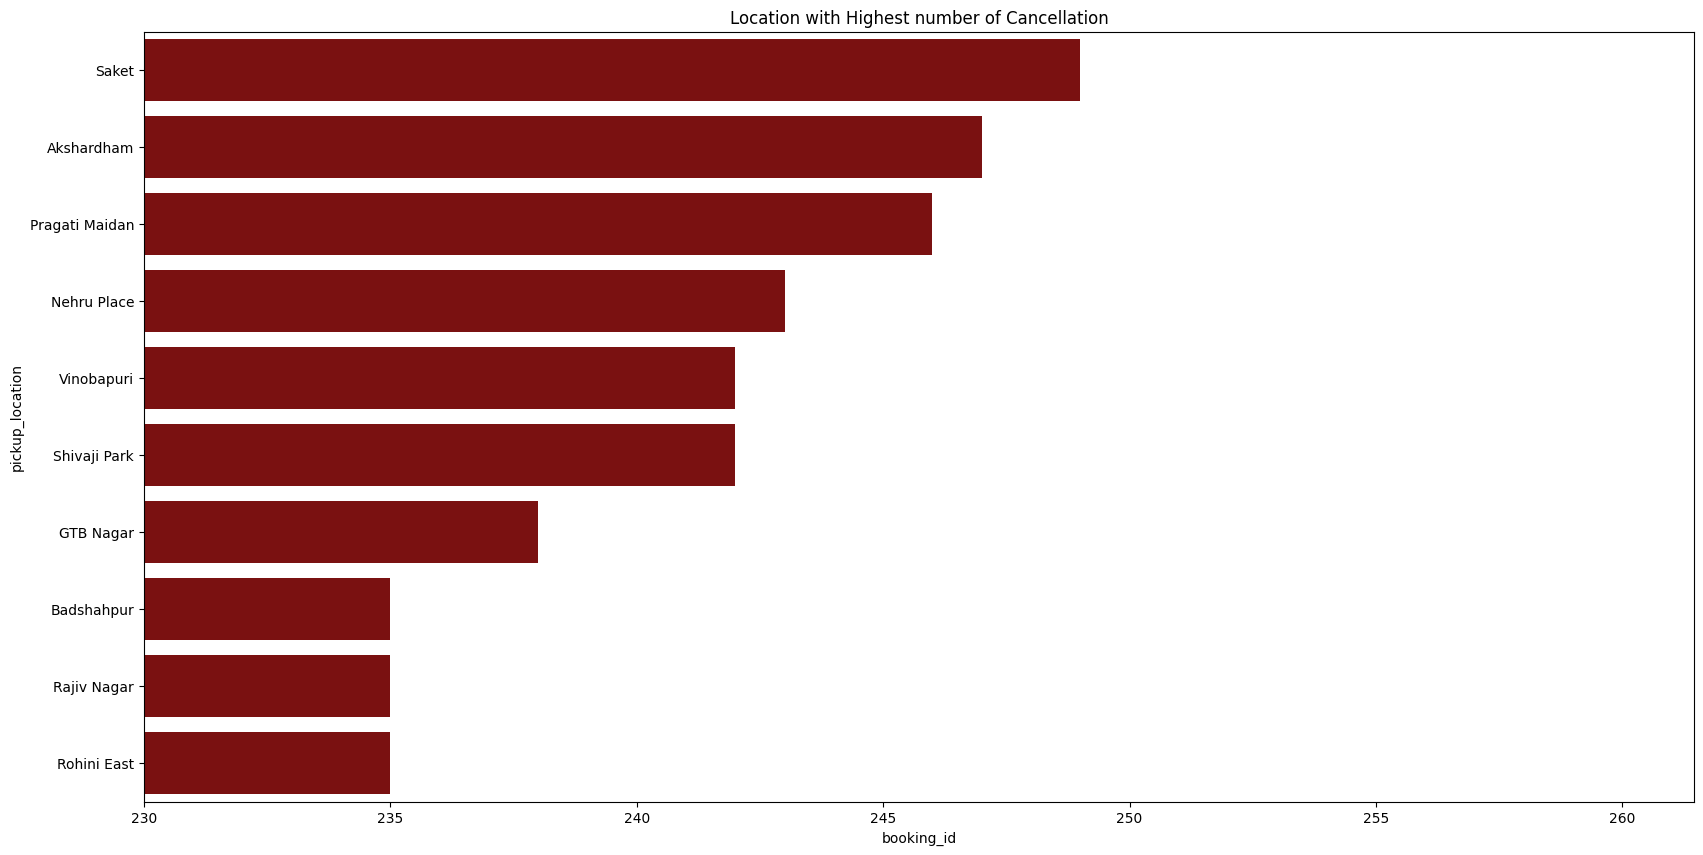

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(
    data = count_cancel.head(10),
    x = 'booking_id',
    y = 'pickup_location',
    color = 'darkred'
)
plt.title('Location with Highest number of Cancellation')
plt.xlim(230,None)

# Even though the difference is not too big, it we still want to keep tracking on "Saket",
# "Akshardham", and "Pragati Maidan"

##### c. Average drive length

In [ ]:
# We will check the ride length of cancelled rides
# It should be Null, as it cancelled
ncr['ride_distance'][ncr.booking_status.str.contains('cancelled')]

# As we can see that they are null

,ride_distance
12,NaN
17,NaN
18,NaN
19,NaN
26,NaN
...,...
149965,NaN
149973,NaN
149977,NaN
149979,NaN


In [ ]:
# Next, we can check the incomplete

incomplete_ride_distance = ncr['ride_distance'][ncr['booking_status'].str.contains('incomplete')]

ncr.describe()
# We can tell the avearage length is 23.72
# Let's check if the length of the incomplete ride is mostly smaller than the average
# if yes => those distances are distances from the pickup -> stop location
# if no => those distances are the total length, estimated from the pickup to booked drop locaiton

(incomplete_ride_distance < 23.72).value_counts()
# All the distances are smaller than the avearage, so we can tell that it only
# track from pickup location to stop location
# Meaning the dataset is correctly tracking the location

,count
ride_distance,
True,8927


In [ ]:
# Now we can find the average length of complete rides, incompleted, and overall
print('Average Length Overall: 23.72')
completed_ride_distance = ncr['ride_distance'][ncr['booking_status'].str.contains('completed')]
print('Average Length of Incompleted Rides:',sum(incomplete_ride_distance)/len(incomplete_ride_distance))
print('Average Length of Completed Rides:',sum(completed_ride_distance)/len(completed_ride_distance))

Average Length Overall: 23.72
Average Length of Incompleted Rides: 10.54832418505657
Average Length of Completed Rides: 26.00472422166334


#### 4. Rating:
- Rating of driver/customer
- Correlation of rating with ride distance and booking value
- Comparation rating for customers vs drivers by time and vehicle type

##### a. Rating of driver/customer


In [ ]:
# We can check if the incompleted ride had ratings or not
ncr['driver_ratings'][ncr.booking_status.str.contains('incomplete')]
# It does not

ncr['customer_rating'][ncr.booking_status.str.contains('incomplete')]
# The same goes with customer rating

,customer_rating
1,NaN
9,NaN
28,NaN
42,NaN
47,NaN
...,...
149870,NaN
149885,NaN
149897,NaN
149912,NaN


In [ ]:
ncr.driver_ratings.describe()

,driver_ratings
count,92248.000000
mean,4.230756
std,0.436741
min,3.000000
25%,4.100000
50%,4.300000
75%,4.600000
max,5.000000


In [ ]:
ncr.customer_rating.describe()

,customer_rating
count,92248.000000
mean,4.404301
std,0.437908
min,3.000000
25%,4.200000
50%,4.500000
75%,4.800000
max,5.000000


##### b. Correlation between driver rating, driving distance, and booking value

In [ ]:
ncr3 = ncr.loc[:,['customer_rating','ride_distance','booking_value']]

ncr.select_dtypes(include='number').corr()

# We can tell that the correlation between rating and driving distance, or booking_value
# are suprisingly low, so we can tell there is no strong connections between the rating
# and value/ distance

,avg_vtat,avg_ctat,cancelled_rides_by_customer,cancelled_rides_by_driver,incomplete_rides,booking_value,ride_distance,driver_ratings,customer_rating
avg_vtat,1.000000,0.062454,0.306444,-0.124024,-0.170356,0.002310,0.063018,-0.005255,-0.004442
avg_ctat,0.062454,1.000000,NaN,NaN,-0.319393,0.000267,0.101506,0.001129,0.001349
cancelled_rides_by_customer,0.306444,NaN,1.000000,-0.128494,-0.069276,NaN,NaN,NaN,NaN
cancelled_rides_by_driver,-0.124024,NaN,-0.128494,1.000000,-0.118406,NaN,NaN,NaN,NaN
incomplete_rides,-0.170356,-0.319393,-0.069276,-0.118406,1.000000,0.000825,-0.313093,NaN,NaN
booking_value,0.002310,0.000267,NaN,NaN,0.000825,1.000000,0.005129,-0.000175,-0.000553
ride_distance,0.063018,0.101506,NaN,NaN,-0.313093,0.005129,1.000000,-0.001857,0.004358
driver_ratings,-0.005255,0.001129,NaN,NaN,NaN,-0.000175,-0.001857,1.000000,-0.000773
customer_rating,-0.004442,0.001349,NaN,NaN,NaN,-0.000553,0.004358,-0.000773,1.000000


##### c. Comparation rating for customers vs drivers by time and vehicle type

In [ ]:
driver_rating_time = ncr.groupby('time')

time_driver_rating = driver_rating_time['driver_ratings'].sum()/driver_rating_time['driver_ratings'].count()

time_driver = time_driver_rating.reset_index()

In [ ]:
driver_rating_vehicle_type = ncr.groupby('vehicle_type')

vehicle_type_driver_rating = driver_rating_vehicle_type.driver_ratings.sum()/driver_rating_vehicle_type.driver_ratings.count()

vehicle_driver = vehicle_type_driver_rating.sort_values(ascending=False).reset_index()

In [ ]:
customer_rating_time = ncr.groupby('time')

time_customer_rating = customer_rating_time.customer_rating.sum()/customer_rating_time.customer_rating.count()

time_customer = time_customer_rating.reset_index()

In [ ]:
customer_rating_vehicle = ncr.groupby('vehicle_type')

vehicle_customer_rating = customer_rating_vehicle.customer_rating.sum()/customer_rating_vehicle.customer_rating.count()

vehicle_customer = vehicle_customer_rating.sort_values(ascending=False).reset_index()

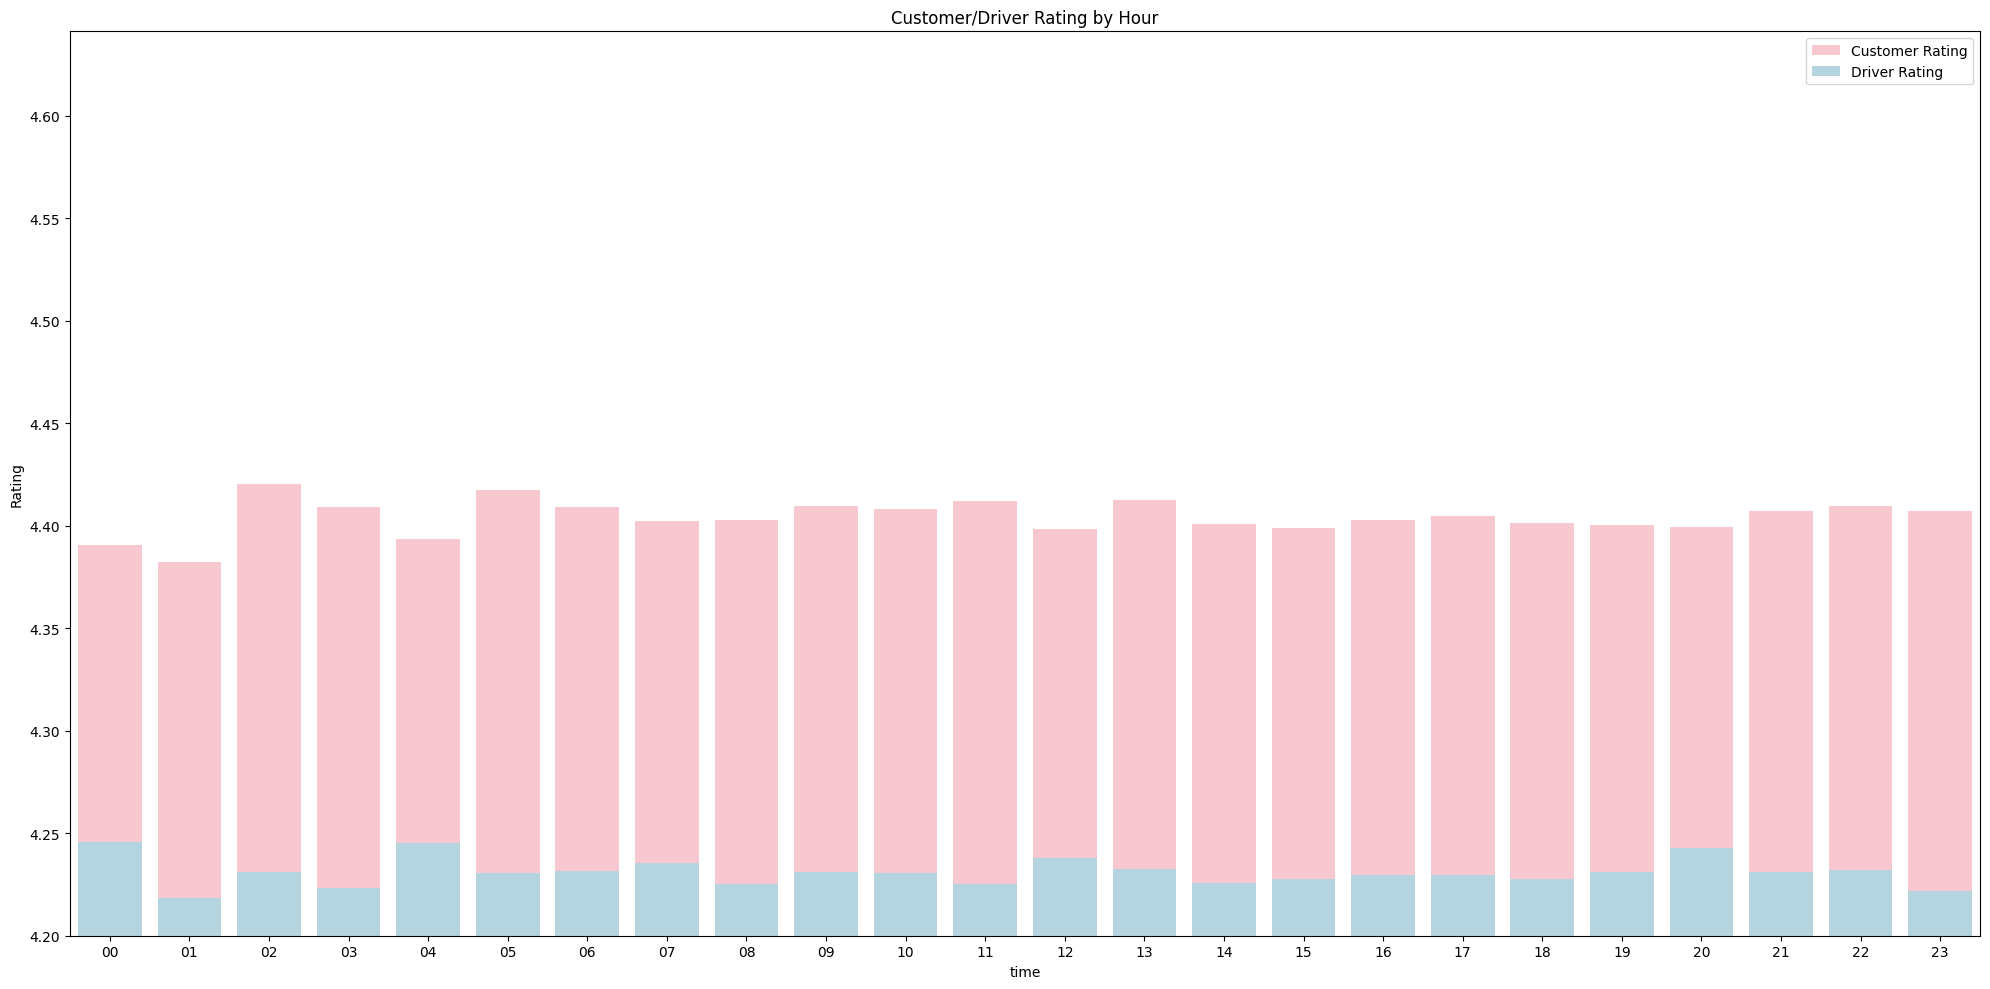

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(
    data = time_customer,
    x = 'time',
    y = 'customer_rating',
    color = 'pink',
    label = 'Customer Rating'
)
plt.ylim(4.2, None)
sns.barplot(
    data = time_driver,
    x = 'time',
    y = 'driver_ratings',
    color = 'lightblue',
    label = 'Driver Rating'
)
plt.title('Customer/Driver Rating by Hour')
plt.ylim(4.2,None)
plt.ylabel('Rating')
plt.tight_layout()

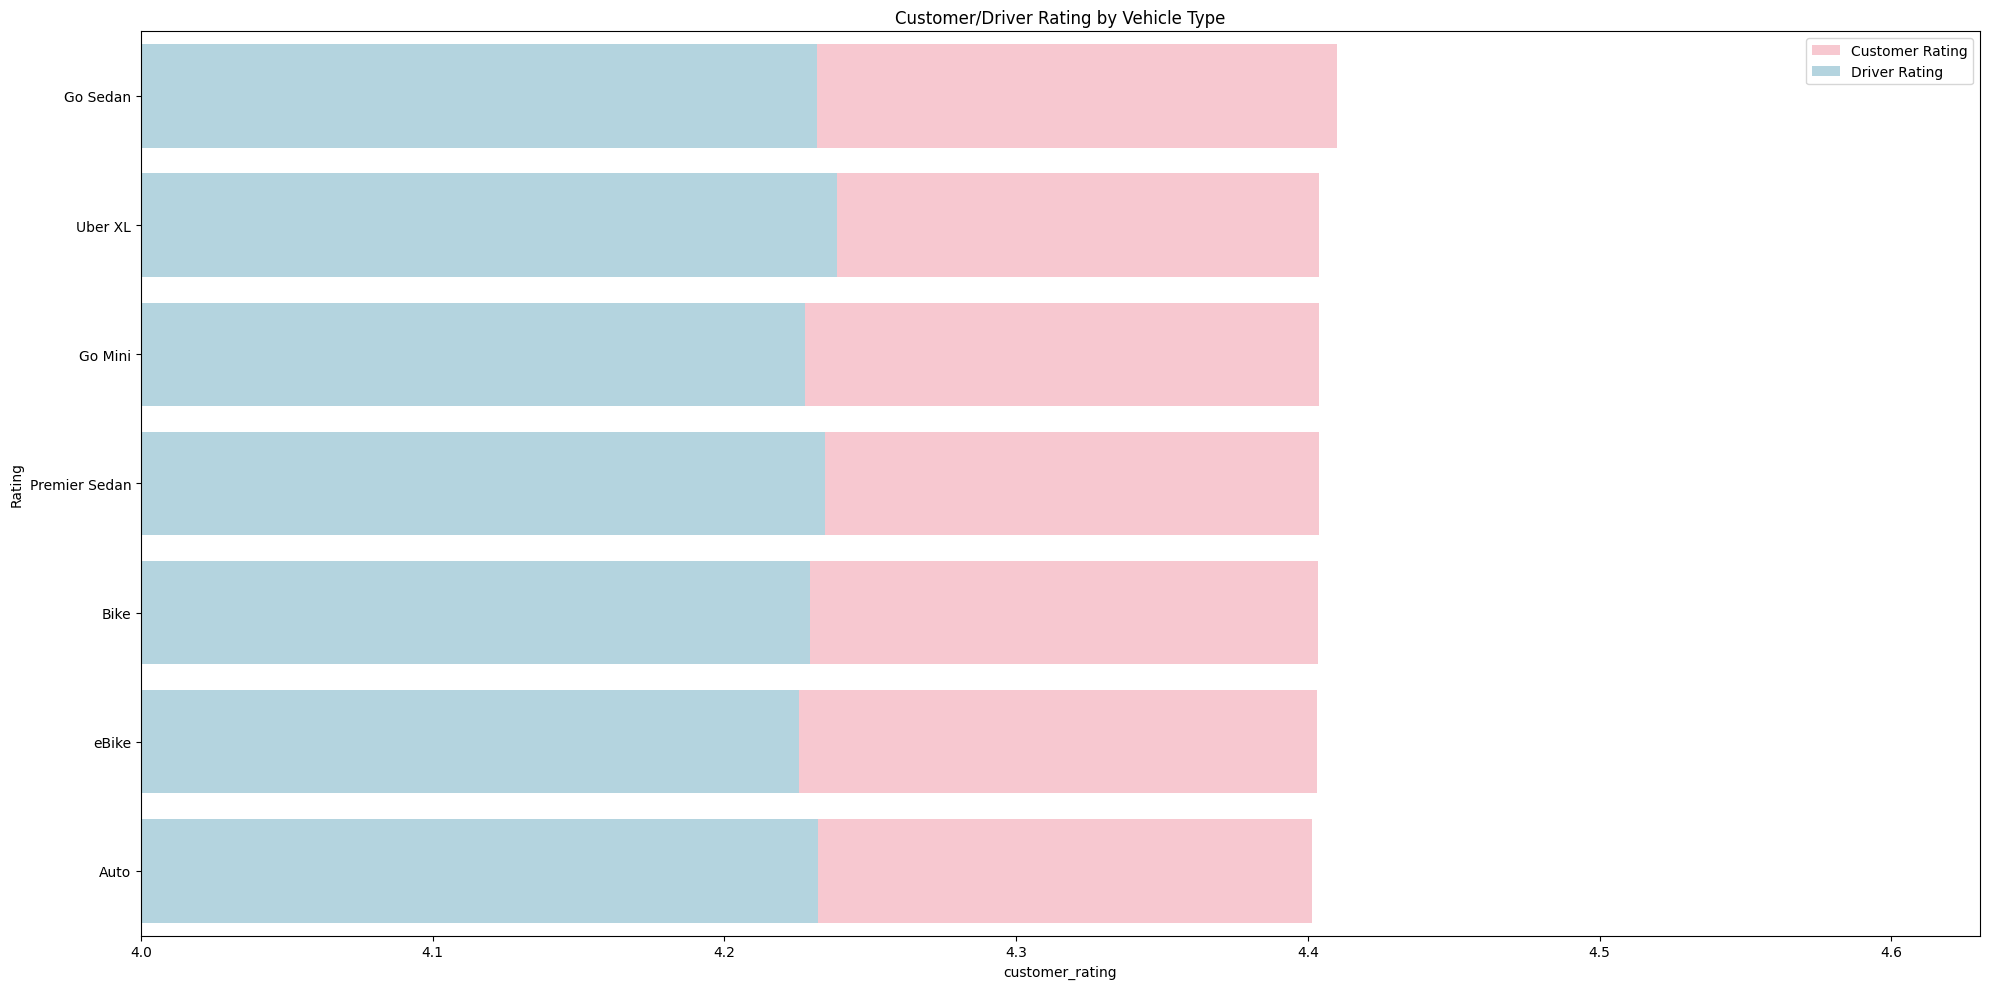

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(
    data = vehicle_customer,
    y = 'vehicle_type',
    x = 'customer_rating',
    color = 'pink',
    label = 'Customer Rating'
)
plt.ylim(4.2, None)
sns.barplot(
    data = vehicle_driver,
    y = 'vehicle_type',
    x = 'driver_ratings',
    color = 'lightblue',
    label = 'Driver Rating'
)
plt.title('Customer/Driver Rating by Vehicle Type')
plt.ylabel('Rating')
plt.xlim(4,None)
plt.tight_layout()

#### 5. Customer
- CustomerID with the highest number of cancellation
- Loyal Customers
- Customers with highest spending
- How VTAT and CTAT affects the cancellation rate
- Combination of vehicle + Payment has the least cancellation

##### a. Loyal Customers

In [ ]:
ncr.groupby('customer_id')['booking_id'].count().sort_values(ascending=False)
# Based on this, we can tell that the highest number of booking in a year is 3

,booking_id
customer_id,
CID8727691,3
CID6468528,3
CID7828101,3
CID6715450,3
CID5481002,3
...,...
CID4017671,1
CID4017688,1
CID4017853,1


In [ ]:
# We assume that loyal customers are customers who booked 3 times or above
# And their rides must be completed
customer_non_cancellation = ncr[ncr['booking_status']=='completed']
customer_non_cancellation

,date,time,booking_id,booking_status,customer_id,vehicle_type,pickup_location,drop_location,avg_vtat,avg_ctat,...,reason_for_cancelling_by_customer,cancelled_rides_by_driver,driver_cancellation_reason,incomplete_rides,incomplete_rides_reason,booking_value,ride_distance,driver_ratings,customer_rating,payment_method
2,2024-08-23,08,CNR8494506,completed,CID9202816,Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,0.0,NaN,0.0,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17,CNR8906825,completed,CID2610914,Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,0.0,NaN,0.0,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22,CNR1950162,completed,CID9933542,Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,0.0,NaN,0.0,NaN,737.0,48.21,4.1,4.3,UPI
5,2024-02-06,09,CNR4096693,completed,CID4670564,Auto,AIIMS,Narsinghpur,5.1,18.1,...,NaN,0.0,NaN,0.0,NaN,316.0,4.85,4.1,4.6,UPI
6,2024-06-17,15,CNR2002539,completed,CID6800553,Go Mini,Vaishali,Punjabi Bagh,7.1,20.4,...,NaN,0.0,NaN,0.0,NaN,640.0,41.24,4.0,4.1,UPI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11,19,CNR6500631,completed,CID4337371,Go Mini,MG Road,Ghitorni,10.2,44.4,...,NaN,0.0,NaN,0.0,NaN,475.0,40.08,3.7,4.1,Uber Wallet
149996,2024-11-24,15,CNR2468611,completed,CID2325623,Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,NaN,0.0,NaN,0.0,NaN,1093.0,21.31,4.8,5.0,UPI
149997,2024-09-18,10,CNR6358306,completed,CID9925486,Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,NaN,0.0,NaN,0.0,NaN,852.0,15.93,3.9,4.4,Cash
149998,2024-10-05,07,CNR3030099,completed,CID9415487,Auto,Ghaziabad,Saidulajab,6.9,39.6,...,NaN,0.0,NaN,0.0,NaN,333.0,45.54,4.1,3.7,UPI


In [ ]:
count_non_cancel = customer_non_cancellation.groupby('customer_id')['booking_id'].count()

count_non_cancel_final = count_non_cancel.sort_values(ascending=False).reset_index()

loyal_customer = count_non_cancel_final[count_non_cancel_final['booking_id'] == 3]

loyal_customer

# CID8727691, CID7828101, and CID4523979 can be considered a loyal customer

,customer_id,booking_id
0,CID8727691,3
1,CID7828101,3
2,CID4523979,3


##### b. Customer with highest numbers of Cancellations

In [ ]:
# Opposite to loyal customers, we want to find customer cancelled rides
count_cancellation = ncr[ncr['booking_status'].str.contains('cancelled')]
count_cancellation

,date,time,booking_id,booking_status,customer_id,vehicle_type,pickup_location,drop_location,avg_vtat,avg_ctat,...,reason_for_cancelling_by_customer,cancelled_rides_by_driver,driver_cancellation_reason,incomplete_rides,incomplete_rides_reason,booking_value,ride_distance,driver_ratings,customer_rating,payment_method
12,2024-06-25,22,CNR4386945,cancelled by driver,CID5543520,eBike,Patel Chowk,Kherki Daula Toll,4.6,NaN,...,NaN,1.0,personal & car related issues,0.0,NaN,NaN,NaN,NaN,NaN,NaN
17,2024-12-15,15,CNR6739317,cancelled by driver,CID8682675,Go Sedan,Vinobapuri,GTB Nagar,6.0,NaN,...,NaN,1.0,customer related issue,0.0,NaN,NaN,NaN,NaN,NaN,NaN
18,2024-11-24,09,CNR6126048,cancelled by customer,CID1060329,eBike,Kashmere Gate,Anand Vihar,12.4,NaN,...,driver is not moving towards pickup location,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
19,2024-05-24,19,CNR9465840,cancelled by driver,CID9046501,eBike,Pitampura,Rajiv Nagar,10.3,NaN,...,NaN,1.0,customer related issue,0.0,NaN,NaN,NaN,NaN,NaN,NaN
26,2024-01-26,09,CNR3614535,cancelled by driver,CID2507102,Auto,Cyber Hub,Saket,11.5,NaN,...,NaN,1.0,personal & car related issues,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149965,2024-10-10,21,CNR5276775,cancelled by customer,CID9234302,Auto,Saket A Block,Hero Honda Chowk,18.1,NaN,...,driver is not moving towards pickup location,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
149973,2024-02-06,18,CNR4828704,cancelled by driver,CID3769079,Go Sedan,Bahadurgarh,DLF City Court,6.3,NaN,...,NaN,1.0,customer related issue,0.0,NaN,NaN,NaN,NaN,NaN,NaN
149977,2024-03-02,13,CNR9330412,cancelled by driver,CID3815156,Go Sedan,Pulbangash,Moolchand,7.8,NaN,...,NaN,1.0,personal & car related issues,0.0,NaN,NaN,NaN,NaN,NaN,NaN
149979,2024-10-05,17,CNR8459494,cancelled by driver,CID9568404,Auto,Chirag Delhi,Palam Vihar,5.9,NaN,...,NaN,1.0,the customer was coughing/sick,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
customer_cancel = count_cancellation.groupby('customer_id')['booking_id'].count().sort_values(ascending=False).reset_index()
# We can tell the highest number of cancellation is 2
customer_cancel[customer_cancel['booking_id']>1]

,customer_id,booking_id
0,CID5290452,2
1,CID2529646,2
2,CID4808946,2
3,CID3333519,2
4,CID7939117,2
...,...,...
72,CID7305349,2
73,CID2922881,2
74,CID4834098,2
75,CID5984338,2


##### c. Customer with Highest Spending

In [ ]:
spending_customer = ncr.groupby('customer_id')['booking_value'].sum().sort_values(ascending=False).head(20).reset_index()
spending_customer

# We can see that the 2/3 loyal customer, many of these are 1 time customer

,customer_id,booking_value
0,CID2674107,4987.0
1,CID7828101,4722.0
2,CID2706299,4277.0
3,CID4843078,4228.0
4,CID2978596,4220.0
5,CID5235759,4202.0
6,CID5789715,4133.0
7,CID9539119,4109.0
8,CID1753183,4088.0
9,CID8107092,4060.0


In [ ]:
print('The highest one time spending:', ncr.booking_value.max())

The highest one time spending: 4277.0


### Data Prediction

For data prediction, we want to predict the status of the booking before it actually happens, in this case, meaning we can predict the booking will be completed/incomplete/cancelled before it actually happens

Because of that we might want to keep features like **date time, avg_vtat, pick_up/drop location, vehicle_type, and payment_method**

We might want to drop columns such as: **avg_ctat, reasons cancelled by driver/customer, incompleted reason, booking value, booking distance, customer/rating** since: reasons cancelled/incomplete will 'spoil' the model, making it not actually learn based on the reasons, which are more likely to be provided later after cancellation. And the same problem goes with booking_value, avg_ctat, ride_distance, customer/driver rating.



In [ ]:
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#### *Preprocessing*

In [ ]:
ncr

,date,time,booking_id,booking_status,customer_id,vehicle_type,pickup_location,drop_location,avg_vtat,avg_ctat,...,reason_for_cancelling_by_customer,cancelled_rides_by_driver,driver_cancellation_reason,incomplete_rides,incomplete_rides_reason,booking_value,ride_distance,driver_ratings,customer_rating,payment_method
0,2024-03-23,12,CNR5884300,no driver found,CID1982111,eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18,CNR1326809,incomplete,CID4604802,Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,0.0,NaN,1.0,vehicle breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08,CNR8494506,completed,CID9202816,Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,0.0,NaN,0.0,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17,CNR8906825,completed,CID2610914,Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,0.0,NaN,0.0,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22,CNR1950162,completed,CID9933542,Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,0.0,NaN,0.0,NaN,737.0,48.21,4.1,4.3,UPI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11,19,CNR6500631,completed,CID4337371,Go Mini,MG Road,Ghitorni,10.2,44.4,...,NaN,0.0,NaN,0.0,NaN,475.0,40.08,3.7,4.1,Uber Wallet
149996,2024-11-24,15,CNR2468611,completed,CID2325623,Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,NaN,0.0,NaN,0.0,NaN,1093.0,21.31,4.8,5.0,UPI
149997,2024-09-18,10,CNR6358306,completed,CID9925486,Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,NaN,0.0,NaN,0.0,NaN,852.0,15.93,3.9,4.4,Cash
149998,2024-10-05,07,CNR3030099,completed,CID9415487,Auto,Ghaziabad,Saidulajab,6.9,39.6,...,NaN,0.0,NaN,0.0,NaN,333.0,45.54,4.1,3.7,UPI


###### Change date and time

In [ ]:
# Date should also be broken down into day of week, Month, Isweeked,
ncr['date'] = pd.to_datetime(ncr['date'], errors='coerce')
ncr['day_of_week'] = ncr['date'].dt.dayofweek
ncr['month']=ncr['date'].dt.month
ncr['day']=ncr['date'].dt.day

ncr = ncr.drop(columns='date')

/tmp/ipython-input-2309080109.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncr['date'] = pd.to_datetime(ncr['date'], errors='coerce')
/tmp/ipython-input-2309080109.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncr['day_of_week'] = ncr['date'].dt.dayofweek
/tmp/ipython-input-2309080109.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [ ]:
ncr['time'] = ncr['time'].astype(int)

In [ ]:
ncr.booking_status.value_counts()

,count
booking_status,
completed,92248
cancelled by driver,26789
cancelled by customer,10402
incomplete,8927


###### drop no driver found and group cancelled ride together



In [ ]:
# For prediction, we might want to remove no driver found
# since it acts more like a null row with no information
ncr = ncr[ncr['booking_status'] != 'no driver found']
ncr['booking_status']=ncr['booking_status'].replace('cancelled by driver', 'cancelled')
ncr['booking_status']=ncr['booking_status'].replace('cancelled by customer', 'cancelled')

ncr['booking_status'].value_counts()

,count
booking_status,
completed,92248
cancelled,37191
incomplete,8927


###### handle non-numerical value

In [ ]:
# We want to use OneHotEncoder to categorize columns: vehicle_type, reason_for_cancelling_by_customer,
# driver_cancellation_reason, incomplete_rides_reason, payment_method

cat_column = [ 'vehicle_type', 'payment_method' ]
cat_encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
# ignore handle_unknown to deal with unknown category
encoded = cat_encoder.fit_transform(ncr[cat_column])
encoded

array([[0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
cat_encoder.categories_

[array(['Auto', 'Bike', 'Go Mini', 'Go Sedan', 'Premier Sedan', 'Uber XL',
        'eBike'], dtype=object),
 array(['Cash', 'Credit Card', 'Debit Card', 'UPI', 'Uber Wallet', nan],
       dtype=object)]

In [ ]:
# Transform these encoded categories to df
encoded_df = pd.DataFrame(
    encoded,
    columns = cat_encoder.get_feature_names_out(cat_column),
    index = ncr.index
)

encoded_df

,vehicle_type_Auto,vehicle_type_Bike,vehicle_type_Go Mini,vehicle_type_Go Sedan,vehicle_type_Premier Sedan,vehicle_type_Uber XL,vehicle_type_eBike,payment_method_Cash,payment_method_Credit Card,payment_method_Debit Card,payment_method_UPI,payment_method_Uber Wallet,payment_method_nan
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
149996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
149997,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
149998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# for pickup_location and drop_location, since there are many unique values in these columns
# It is a good choice to category these columns by the top 10, then the rest by Other. The reason for it is that
# pick up location and drop location, as we discovered above, do not have relationships with booking_status

top_10_pickup = ncr['pickup_location'].value_counts().nlargest(10).index
ncr['pickup_encoded'] = ncr['pickup_location'].apply(lambda x: x if x in top_10_pickup else 'Other')
ncr = pd.get_dummies(ncr, columns=['pickup_encoded'], prefix='pickup', drop_first=True)

In [ ]:
# The same goes with drop location
top_10_drop = ncr['drop_location'].value_counts().nlargest(10).index
ncr['drop_encoded'] = ncr['drop_location'].apply(lambda x: x if x in top_10_drop else 'Other')
ncr = pd.get_dummies(ncr, columns = ['drop_encoded'], prefix = 'drop', drop_first=True)

In [ ]:
# Now for customer_id, since the highest frequency is 3 (as explored previously), it might be a better ideat to drop it, since for now, it acts more like
# 'noise' rather than a good value to keep track on

ncr = ncr.drop(columns=['customer_id','booking_id','cancelled_rides_by_customer','cancelled_rides_by_driver', 'incomplete_rides'])

In [ ]:
ncr

,time,booking_status,vehicle_type,pickup_location,drop_location,avg_vtat,avg_ctat,reason_for_cancelling_by_customer,driver_cancellation_reason,incomplete_rides_reason,...,drop_Basai Dhankot,drop_Cyber Hub,drop_Lajpat Nagar,drop_Lok Kalyan Marg,drop_Narsinghpur,drop_Nehru Place,drop_Other,drop_Punjabi Bagh,drop_Shastri Nagar,drop_Udyog Vihar
1,18,incomplete,Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,NaN,vehicle breakdown,...,False,False,False,False,False,False,True,False,False,False
2,8,completed,Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,NaN,NaN,...,False,False,False,False,False,False,True,False,False,False
3,17,completed,Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,NaN,NaN,...,False,False,False,False,False,False,True,False,False,False
4,22,completed,Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,NaN,NaN,...,False,False,False,False,False,False,True,False,False,False
5,9,completed,Auto,AIIMS,Narsinghpur,5.1,18.1,NaN,NaN,NaN,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,19,completed,Go Mini,MG Road,Ghitorni,10.2,44.4,NaN,NaN,NaN,...,False,False,False,False,False,False,True,False,False,False
149996,15,completed,Go Mini,Golf Course Road,Akshardham,5.1,30.8,NaN,NaN,NaN,...,False,False,False,False,False,False,True,False,False,False
149997,10,completed,Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,NaN,NaN,NaN,...,False,False,False,False,False,False,True,False,False,False
149998,7,completed,Auto,Ghaziabad,Saidulajab,6.9,39.6,NaN,NaN,NaN,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
ncr = pd.concat([ncr,encoded_df], axis=1)
ncr

,time,booking_status,vehicle_type,pickup_location,drop_location,avg_vtat,avg_ctat,reason_for_cancelling_by_customer,driver_cancellation_reason,incomplete_rides_reason,...,vehicle_type_Go Sedan,vehicle_type_Premier Sedan,vehicle_type_Uber XL,vehicle_type_eBike,payment_method_Cash,payment_method_Credit Card,payment_method_Debit Card,payment_method_UPI,payment_method_Uber Wallet,payment_method_nan
1,18,incomplete,Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,NaN,vehicle breakdown,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8,completed,Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,17,completed,Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,22,completed,Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,9,completed,Auto,AIIMS,Narsinghpur,5.1,18.1,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,19,completed,Go Mini,MG Road,Ghitorni,10.2,44.4,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
149996,15,completed,Go Mini,Golf Course Road,Akshardham,5.1,30.8,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
149997,10,completed,Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
149998,7,completed,Auto,Ghaziabad,Saidulajab,6.9,39.6,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


###### handle numerical value

In [ ]:
ncr.select_dtypes('number')

,time,avg_vtat,avg_ctat,booking_value,ride_distance,driver_ratings,customer_rating,day_of_week,month,day,...,vehicle_type_Go Sedan,vehicle_type_Premier Sedan,vehicle_type_Uber XL,vehicle_type_eBike,payment_method_Cash,payment_method_Credit Card,payment_method_Debit Card,payment_method_UPI,payment_method_Uber Wallet,payment_method_nan
1,18,4.9,14.0,237.0,5.73,NaN,NaN,4,11,29,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8,13.4,25.8,627.0,13.58,4.9,4.9,4,8,23,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,17,13.1,28.5,416.0,34.02,4.6,5.0,0,10,21,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,22,5.3,19.6,737.0,48.21,4.1,4.3,0,9,16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,9,5.1,18.1,316.0,4.85,4.1,4.6,1,2,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,19,10.2,44.4,475.0,40.08,3.7,4.1,0,11,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
149996,15,5.1,30.8,1093.0,21.31,4.8,5.0,6,11,24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
149997,10,2.7,23.4,852.0,15.93,3.9,4.4,2,9,18,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
149998,7,6.9,39.6,333.0,45.54,4.1,3.7,5,10,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
ncr.columns
replace_true_false = ['pickup_Badarpur', 'pickup_Barakhamba Road',
       'pickup_Dwarka Sector 21', 'pickup_Khandsa', 'pickup_Madipur',
       'pickup_Other', 'pickup_Pragati Maidan', 'pickup_Saket',
       'pickup_Shivaji Park', 'pickup_Vishwavidyalaya', 'drop_Basai Dhankot',
       'drop_Cyber Hub', 'drop_Lajpat Nagar', 'drop_Lok Kalyan Marg',
       'drop_Narsinghpur', 'drop_Nehru Place', 'drop_Other',
       'drop_Punjabi Bagh', 'drop_Shastri Nagar', 'drop_Udyog Vihar']

ncr[replace_true_false] = ncr[replace_true_false].astype('int')

In [ ]:
ncr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138366 entries, 1 to 149999
Data columns (total 51 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   time                               138366 non-null  int64  
 1   booking_status                     138366 non-null  object 
 2   vehicle_type                       138366 non-null  object 
 3   pickup_location                    138366 non-null  object 
 4   drop_location                      138366 non-null  object 
 5   avg_vtat                           138366 non-null  float64
 6   avg_ctat                           101175 non-null  float64
 7   reason_for_cancelling_by_customer  10402 non-null   object 
 8   driver_cancellation_reason         26789 non-null   object 
 9   incomplete_rides_reason            8927 non-null    object 
 10  booking_value                      101175 non-null  float64
 11  ride_distance                      101175 no

In [ ]:
le = LabelEncoder()
ncr['booking_status_encoded'] = le.fit_transform(ncr['booking_status'])

,time,booking_status,avg_vtat,avg_ctat,booking_value,ride_distance,driver_ratings,customer_rating,day_of_week,month,...,vehicle_type_Premier Sedan,vehicle_type_Uber XL,vehicle_type_eBike,payment_method_Cash,payment_method_Credit Card,payment_method_Debit Card,payment_method_UPI,payment_method_Uber Wallet,payment_method_nan,booking_status_encoded
1,18,incomplete,4.9,14.0,237.0,5.73,NaN,NaN,4,11,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
2,8,completed,13.4,25.8,627.0,13.58,4.9,4.9,4,8,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
3,17,completed,13.1,28.5,416.0,34.02,4.6,5.0,0,10,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,22,completed,5.3,19.6,737.0,48.21,4.1,4.3,0,9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
5,9,completed,5.1,18.1,316.0,4.85,4.1,4.6,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,19,completed,10.2,44.4,475.0,40.08,3.7,4.1,0,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
149996,15,completed,5.1,30.8,1093.0,21.31,4.8,5.0,6,11,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
149997,10,completed,2.7,23.4,852.0,15.93,3.9,4.4,2,9,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
149998,7,completed,6.9,39.6,333.0,45.54,4.1,3.7,5,10,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

num_columns = ncr[['time', 'day_of_week', 'month', 'day', 'avg_vtat']]
num_features = ['time', 'day_of_week', 'month', 'day', 'avg_vtat']

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy ='median')),
#('std_scaler', StandardScaler())
]
)

ncr_num = num_pipeline.fit_transform(num_columns)\

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_features)
    ],
    remainder = 'passthrough'
)

#### XGBOOST MODEL

In [ ]:
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, classification_report, confusion_matrix
import xgboost as xgb

label = ncr['booking_status_encoded']
features = ncr.drop(['booking_status','booking_status_encoded','avg_ctat', 'booking_value', 'ride_distance', 'driver_ratings',
                     'customer_rating'], axis=1)

y = label
X = features

X_train, X_test, y_train, y_test= train_test_split(
    X, y, test_size = 0.2, random_state=42, stratify = y
)

model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', xgb.XGBClassifier(
        objective='multi:softprob',
        num_class=3,
        eval_metric='mlogloss',
        tree_method='hist',
        n_estimators=300,
        random_state=42,
        n_jobs=-1
    ))
])

model_pipeline.fit(X_train, y_train)


y_pred = model_pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("Macro F1:", f1_score(y_test, y_pred, average='macro'))
print("\nClassification report:")
print(classification_report(y_test, y_pred))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9330779793307797
Balanced Accuracy: 0.6674970942318605
Macro F1: 0.654936309966682

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7438
           1       0.91      1.00      0.95     18450
           2       0.13      0.01      0.01      1786

    accuracy                           0.93     27674
   macro avg       0.68      0.67      0.65     27674
weighted avg       0.89      0.93      0.90     27674

Confusion matrix:
[[ 7438     0     0]
 [    0 18372    78]
 [    0  1774    12]]
